In [ ]:
### import packages ###
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
from pathlib import Path
from typing import List
from scipy import integrate
from matplotlib.lines import Line2D

In [ ]:
### import for latex plot style
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

# Rubber bands

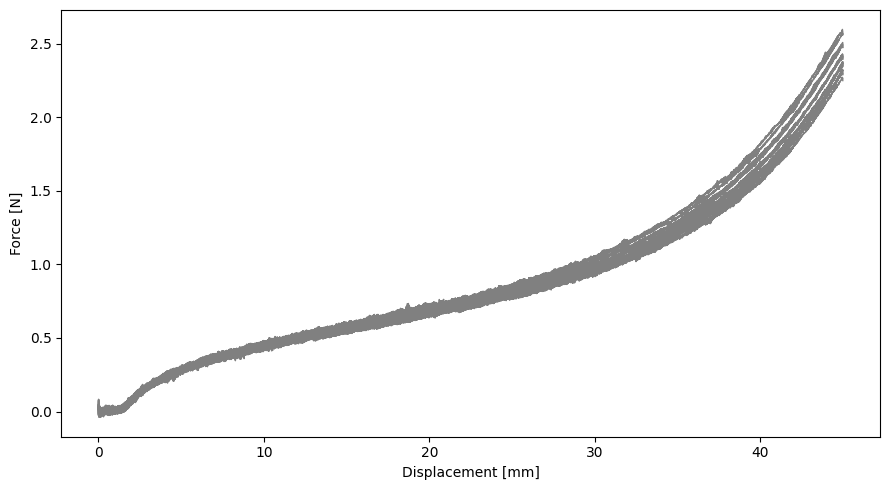

In [ ]:
data_files = sorted(
    list(Path('./Rubber_bands').glob("*.txt"))
)

data_1 = data_files[5:10]
data_2 = data_files[15:20]
data_3 = data_files[25:30]
data_4 = data_1 + data_2 + data_3

def get_extension_data(paths: List[str]):
    return

def read_instron_data(path: str):
    time, displacement, force = np.loadtxt(path, skiprows=3, delimiter=" ", unpack=True)
    return time, displacement, force


def plot_raw_force_displacement_curves(paths: List[str], **plot_kwargs):
    fig, axes = plt.subplots(figsize=(9, 5))

    for file in paths:
        _, u, f = read_instron_data(file)
        axes.plot(u[:len(u)//2], f[:len(u)//2], **plot_kwargs)
        #print(len(u))

    axes.set(xlabel="Displacement [mm]", ylabel="Force [N]")
    fig.tight_layout()

    return fig, axes
fig, axes = plot_raw_force_displacement_curves(data_4, lw=1, color="gray", label="Experiment")

0.028548624974426895


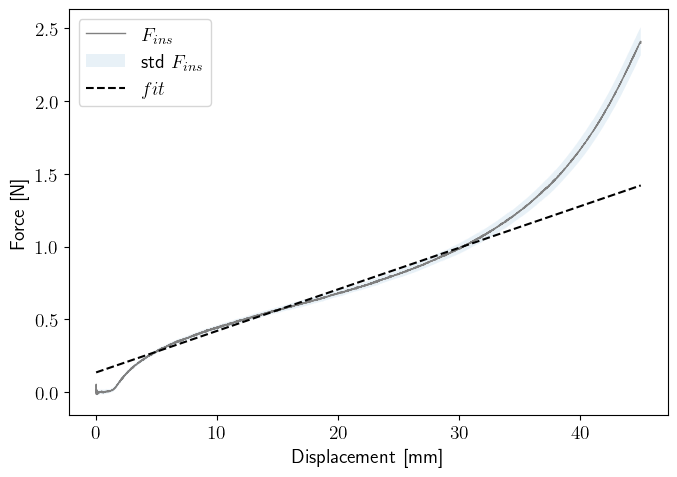

In [ ]:
plt.rcParams.update({
    'font.size': 14,
    'text.usetex': True,
    'font.family':'sans-serif',  # Choose appropriate font family
})

def plot_average_force_displacement_curve(paths: List[str], **plot_kwargs):
    fig, axes = plt.subplots(figsize=(7, 5))
    F = []
    U = []
    for file in paths:
        _, u, f = read_instron_data(file)
        U.append(u[:len(u)//2])
        F.append(f[:len(u)//2])
        #print(len(u))
    mean_u = np.mean(U, axis=0)
    mean_f = np.mean(F, axis=0)
    std_f = np.std(F, axis=0)
    coef = np.polyfit(mean_u[(mean_u>5)&(mean_u<35)],mean_f[(mean_u>5)&(mean_u<35)],1)
    polyfit_fn = np.poly1d(coef)
    axes.plot(mean_u, mean_f, **plot_kwargs,label = r'$F_{ins}$')
    axes.fill_between(mean_u, mean_f-std_f, mean_f+std_f, alpha=0.1, label = 'std $F_{ins}$')
    axes.plot(mean_u, polyfit_fn(mean_u),'--k',label = r'$fit$')

    axes.set(xlabel="Displacement [mm]", ylabel="Force [N]")
    plt.legend()
    fig.tight_layout()
    print(coef[0])
    return fig, axes, coef[0]

fig, axes, k_rubber = plot_average_force_displacement_curve(data_4, lw=1, color="gray")
fig.savefig(r'./rubberband_10.pdf', dpi=600)

# rubberbands robot stiffness


[PosixPath('26Oct_2unit/robot_rubbers.is_tcyclic_Exports/robot_rubbers_17.txt')
 PosixPath('26Oct_2unit/robot_rubbers.is_tcyclic_Exports/robot_rubbers_18.txt')
 PosixPath('26Oct_2unit/robot_rubbers.is_tcyclic_Exports/robot_rubbers_19.txt')
 PosixPath('26Oct_2unit/robot_rubbers.is_tcyclic_Exports/robot_rubbers_20.txt')]
26Oct_2unit/robot_rubbers.is_tcyclic_Exports/robot_rubbers_10.txt


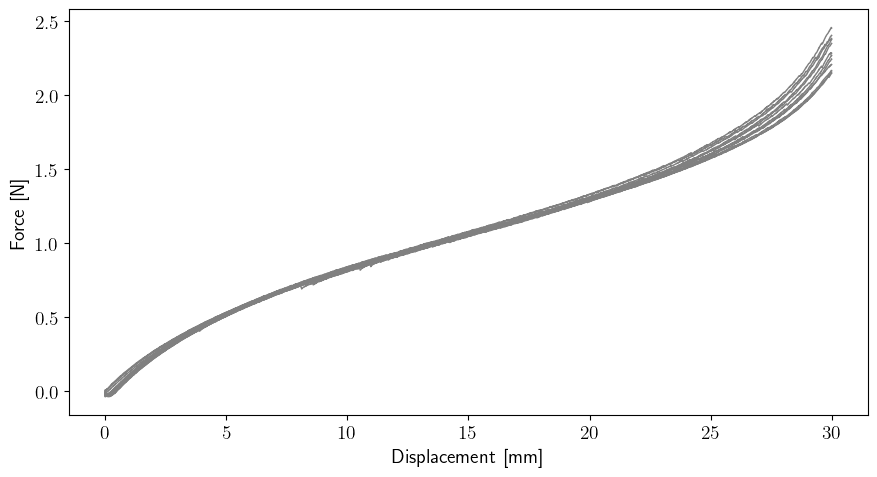

In [ ]:

data_files = sorted(
    list(Path('./Rubber_bands_robot').glob("*.txt"))
)
data_files = np.array(data_files)
print(data_files[np.array([8,9,10,12])])
print(data_files[1])
data_1 = data_files[np.array([11,13,14,15])]
data_2 = data_files[np.array([3,4,5,6])]
data_3 = data_files[np.array([8,9,10,12])]
data_4 = data_files[np.array([11,13,14,15,3,4,5,6,8,9,10,12])]

def get_extension_data(paths: List[str]):
    return

def read_instron_data(path: str):
    time, displacement, force = np.loadtxt(path, skiprows=3, delimiter=" ", unpack=True)
    return time, displacement, force


def plot_raw_force_displacement_curves(paths: List[str], **plot_kwargs):
    fig, axes = plt.subplots(figsize=(9, 5))

    for file in paths:
        _, u, f = read_instron_data(file)
        axes.plot(u[:len(u)//2], f[:len(u)//2], **plot_kwargs)
        #print(len(u))

    axes.set(xlabel="Displacement [mm]", ylabel="Force [N]")
    fig.tight_layout()

    return fig, axes
fig, axes = plot_raw_force_displacement_curves(data_4, lw=1, color="gray", label="Experiment")



0.04704793029409679


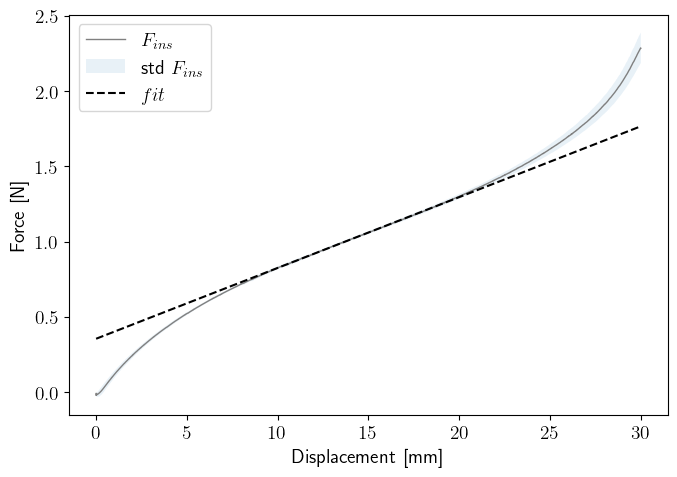

In [ ]:
def plot_average_force_displacement_curve(paths: List[str], **plot_kwargs):
    fig, axes = plt.subplots(figsize=(7, 5))
    F = []
    U = []
    for file in paths:
        _, u, f = read_instron_data(file)
        U.append(u[:len(u)//2])
        F.append(f[:len(u)//2])
        #print(len(u))
    mean_u = np.mean(U, axis=0)
    mean_f = np.mean(F, axis=0)
    std_f = np.std(F, axis=0)
    coef = np.polyfit(mean_u[(mean_u>10)&(mean_u<20)],mean_f[(mean_u>10)&(mean_u<20)],1)
    polyfit_fn = np.poly1d(coef)
    axes.plot(mean_u, mean_f, **plot_kwargs,label = r'$F_{ins}$')
    axes.fill_between(mean_u, mean_f-std_f, mean_f+std_f, alpha=0.1, label = 'std $F_{ins}$')
    axes.plot(mean_u, polyfit_fn(mean_u),'--k',label = r'$fit$')

    axes.set(xlabel="Displacement [mm]", ylabel="Force [N]")
    plt.legend()
    fig.tight_layout()
    print(coef[0])
    return fig, axes, coef[0]

fig, axes, k_robot = plot_average_force_displacement_curve(data_4, lw=1, color="gray")
fig.savefig(r'./rubberband_22.pdf', dpi=600)

# Analytical

In [ ]:
#### Calculate the analytical reaction force and energy

l0_rubber = 10
r = 10*np.sqrt(2)
rotation = (np.linspace(-45,45,100))/180*np.pi

### converts the instron displacement to angles
def find_angle(r,l,dx):
    x = dx+l-r*np.sqrt(2)/2
    h = r*np.sqrt(2)/2
    angle = -np.arccos((1/(2*r**2*(h**2+x**2)))*(-l**2*r*x+h**2*r*x + r**3*x + r*x**3 - np.sqrt(-h**2*r**2*(l**4 + (h**2 - r**2 + x**2)**2 - 2*l**2*(h**2 + r**2 + x**2)))))
    return angle+np.pi/2

def position_bar(l_bar, r, theta):
    dx = r*np.cos(theta)-r*np.cos(theta[0])
    dy = np.sqrt(l_bar**2-dx**2)
    return dx,dy

def calc_force(p0,p1,l_bar, r,k_rubber,theta):
    #Calc positions of rubber band
    x0, y0 = p0
    x1, y1 = p1
    dx = -x0 + r*np.cos(theta) + x1
    dy = -y0 + r*np.sin(theta) + y1

    #Calc Forces rubber band
    extension = np.sqrt(dx**2+dy**2)-l0_rubber
    F_spring = -k_rubber*extension
    Fspring_x = F_spring*dx/np.sqrt(dx**2+dy**2)
    Fspring_y = F_spring*dy/np.sqrt(dx**2+dy**2)

    # Calc direction hinges and bar
    dx_hinge, dy_hinge = r*np.cos(theta),r*np.sin(theta)
    hinge_ratio = dy_hinge/dx_hinge
    dx_bar, dy_bar = position_bar(l_bar,r,theta)
    bar_ratio = dx_bar/dy_bar

    #calc instron force
    Finstron_y = (hinge_ratio*Fspring_x-Fspring_y)

    #print(F_y[0])
    E = k_rubber/2*extension**2
    return Finstron_y, E

# Experiment

## internal friction

(2989,)
(2989,)
(2980,)
(2989,)
(2989,)


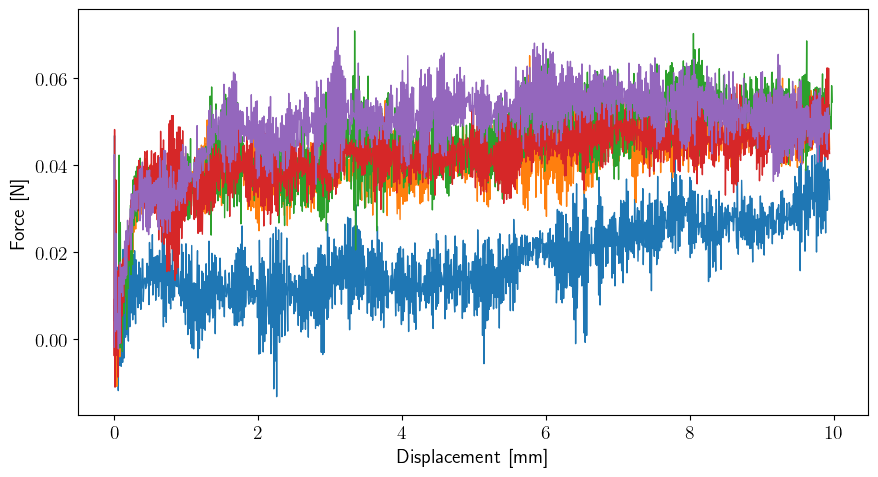

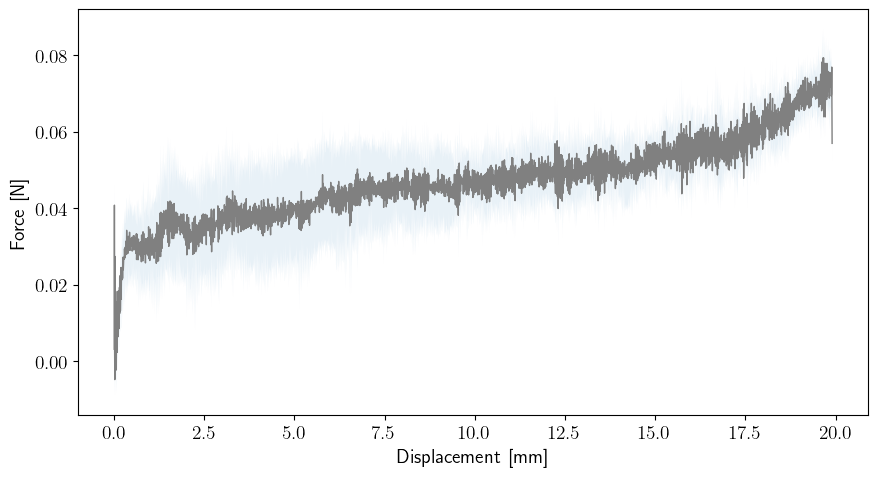

In [ ]:
friction_1Unit = sorted(
    list(Path('./1unit/friction.is_tcyclic_Exports').glob("*.txt"))
)
def read_instron_data(path: str):
    time, displacement, force = np.loadtxt(path, skiprows=3, delimiter=" ", unpack=True)
    return time, displacement, force


def plot_raw_force_displacement_curves(paths: List[str], **plot_kwargs):
    fig, axes = plt.subplots(figsize=(9, 5))

    for file in paths:
        _, u, f = read_instron_data(file)
        print(u.shape)
        axes.plot(u[:len(u)//2], f[:len(u)//2], **plot_kwargs)
        #print(len(u))

    axes.set(xlabel="Displacement [mm]", ylabel="Force [N]")
    fig.tight_layout()

    return fig, axes
fig, axes = plot_raw_force_displacement_curves(friction_1Unit, lw=1, label="Experiment")

def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    arr = np.ma.empty((np.max(lens),len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    return arr.mean(axis = -1), arr.std(axis=-1)


def plot_average_curve(paths: List[str], **plot_kwargs):
    fig, axes = plt.subplots(figsize=(9, 5))
    F = []
    U = []
    for file in paths:
        _, u, f = read_instron_data(file)
        U.append(u[:len(u)])
        F.append(f[:len(u)])
        #print(len(u))
    mean_u, std_u = tolerant_mean(U)
    mean_f, std_f = tolerant_mean(F)
    axes.plot(mean_u, mean_f, **plot_kwargs)
    axes.fill_between(mean_u, mean_f-std_f, mean_f+std_f, alpha=0.1)
    axes.set(xlabel="Displacement [mm]", ylabel="Force [N]")
    fig.tight_layout()
    return fig, axes, mean_f

fig, axes, unit1_friction = plot_average_curve(friction_1Unit, lw=1, color="gray", label="Experiment")


## 1 unit p_in = [-10,0] mm

MM
MB
MLB
MRB
ML
MR
MT
MLT
MRT


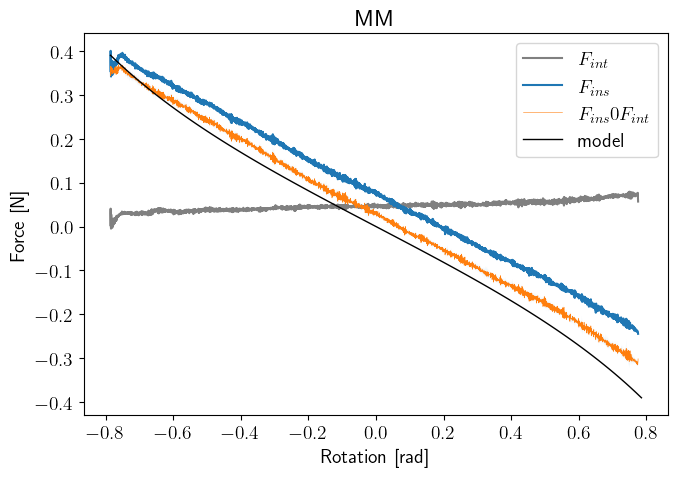

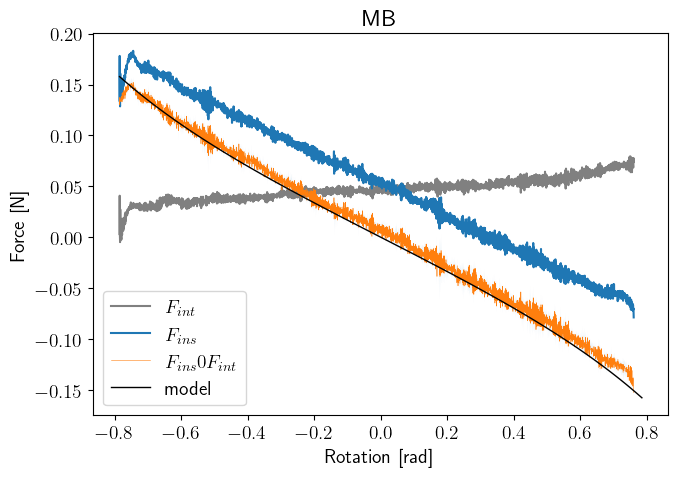

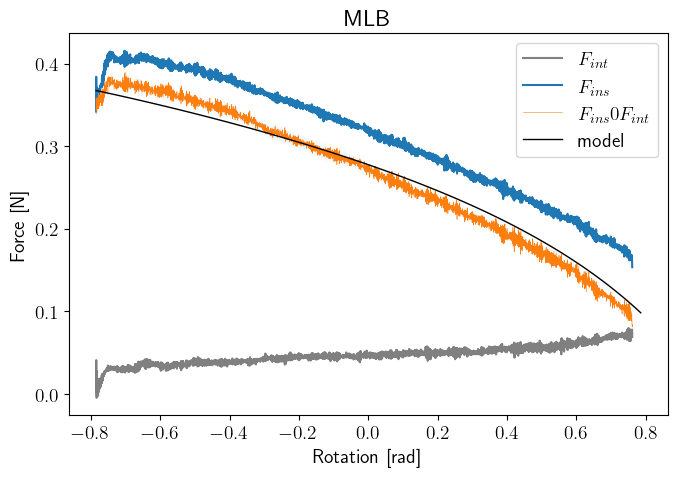

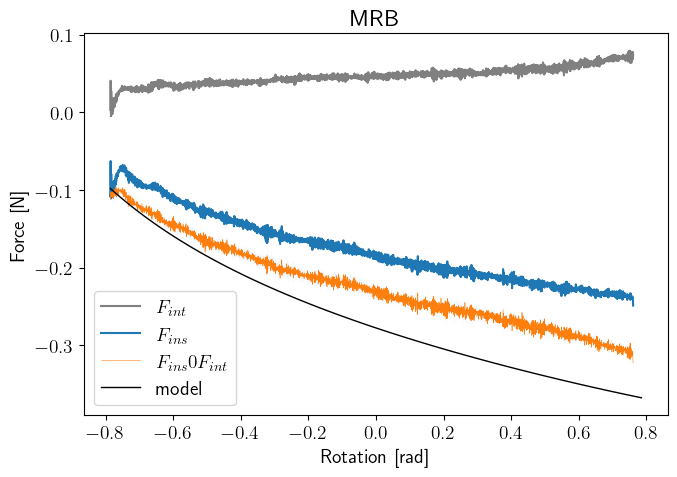

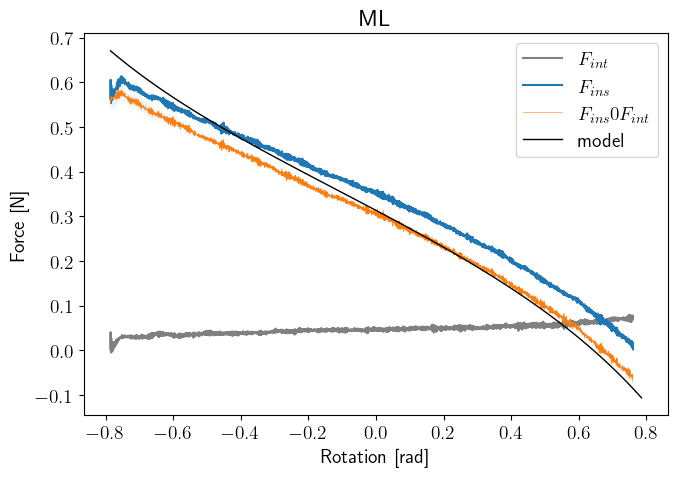

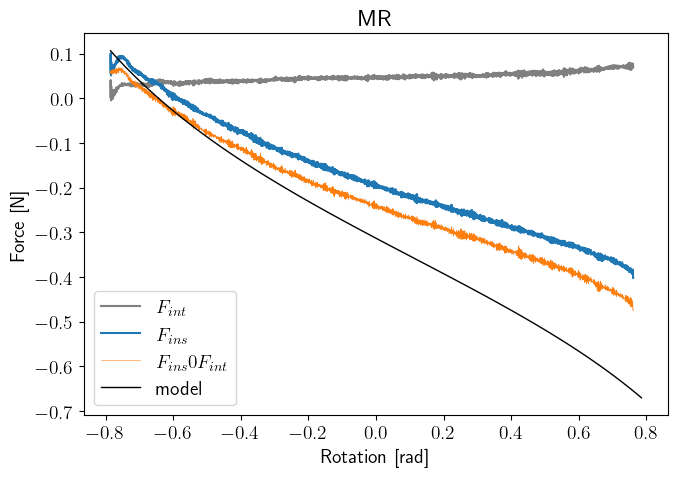

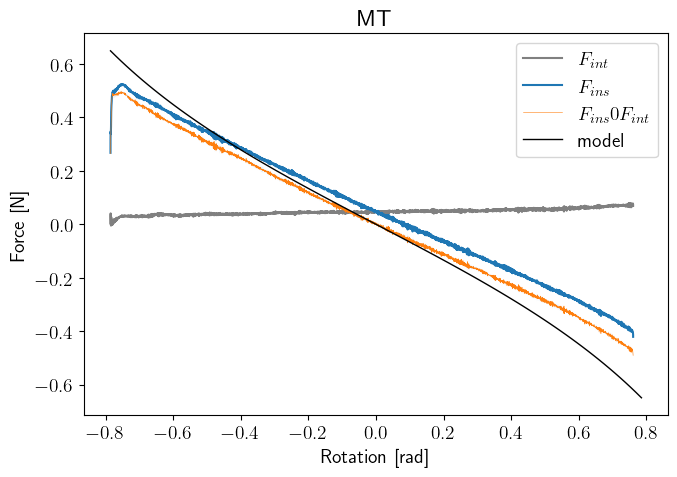

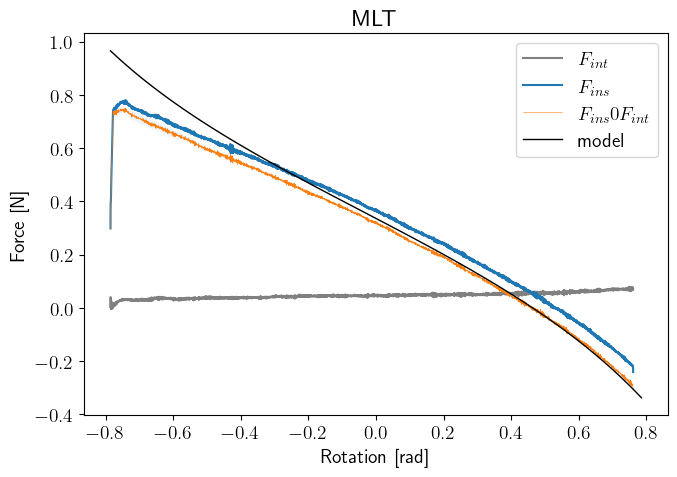

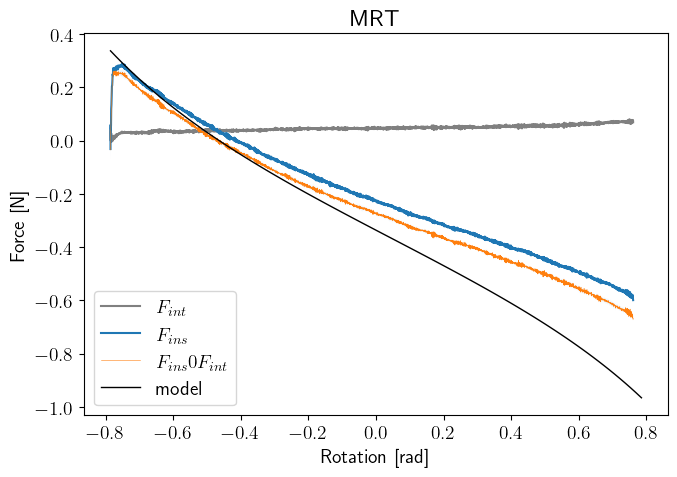

In [ ]:
units = ['1unit','1unit_','2unit','2unit_2']
unit1_id1 = ['MM','MB','MLB','MRB','ML','MR','MT','MLT','MRT']
id_p1 =[[10,0],[0,0],[0,15],[0,-15],[10,15],[10,-15],[20,0],[20,15],[20,-15]]
#id_p1 =[[0,0]]
p0_1 = [-10,0]
l_bar = 70

def plot_average_experiment(paths: List[str], syst_error,k,r,l,id,id_p, **plot_kwargs):
    fig, axes = plt.subplots(figsize=(7, 5))
    F = []
    Theta = []
    U = []
    for file in paths:
        _, u, f = read_instron_data(file)
        U.append(u)
        theta = []
        for i in range(len(u)):
            theta.append(find_angle(r,l,u[i]))
        Theta.append(theta)
        F.append(f)

    mean_u, std_u = tolerant_mean(U)
    mean_theta, std_theta = tolerant_mean(Theta)
    #print(len(F[0]),len(syst_error))
    mean_f, std_f = tolerant_mean(F)
    mean_f -= syst_error[:len(mean_f)]

    rotation = (np.linspace(-45,45,100))/180*np.pi
    F_y, E = calc_force(p0_1,id_p1[id_p],l_bar,r,k,rotation)

    axes.plot(mean_theta, syst_error[:len(mean_theta)], label = '$F_{int}$', color = 'grey')
    axes.plot(mean_theta,mean_f + syst_error[:len(mean_theta)], label = '$F_{ins}$')
    axes.plot(mean_theta, mean_f, **plot_kwargs, label = '$F_{ins}0 F_{int}$')
    axes.plot(rotation,F_y,lw = 1, color = 'black', label = 'model')

    axes.fill_between(mean_theta, mean_f-std_f, mean_f+std_f, alpha=0.1)
    axes.set(xlabel="Rotation [rad]", ylabel="Force [N]",title=id)
    plt.legend()
    fig.tight_layout()
    return fig, axes

for idx, elem in enumerate(unit1_id1):
    unit1_data = sorted(list(Path(f'./1unit/1unit_{elem}.is_tcyclic_Exports').glob("*.txt")))
    unit1_1 = unit1_data[:3] #1 rubber band
    unit1_2 = unit1_data[3:6] #2 rubber bands
    print(elem)
    fig, axes = plot_average_experiment(unit1_1,unit1_friction,k_rubber, r,l_bar,elem,idx, lw=0.4)
    #plot_average_experiment(unit1_2,unit1_friction,2*k_rubber, r,l_bar,elem,idx, lw=0.4)
    if idx == 1:
        fig.savefig(r'./internal_friction_1.pdf', dpi=600)



MM
MB
MLB
MRB
ML
MR
MT
MLT
MRT


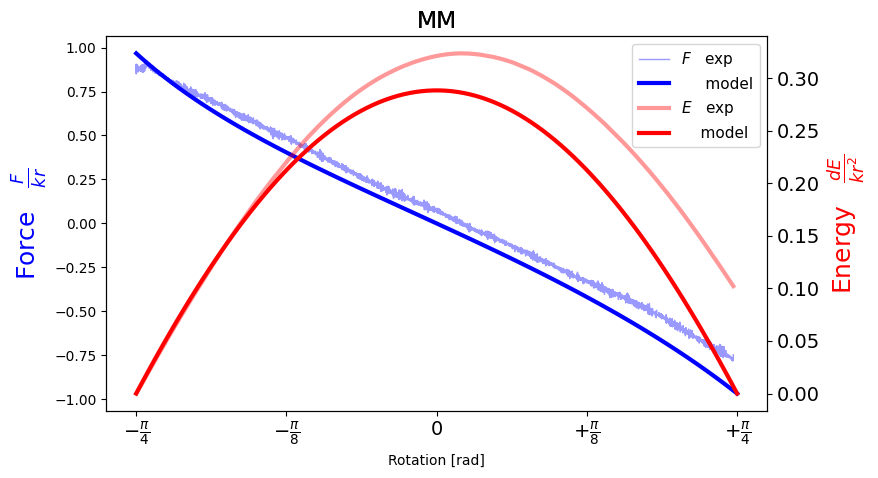

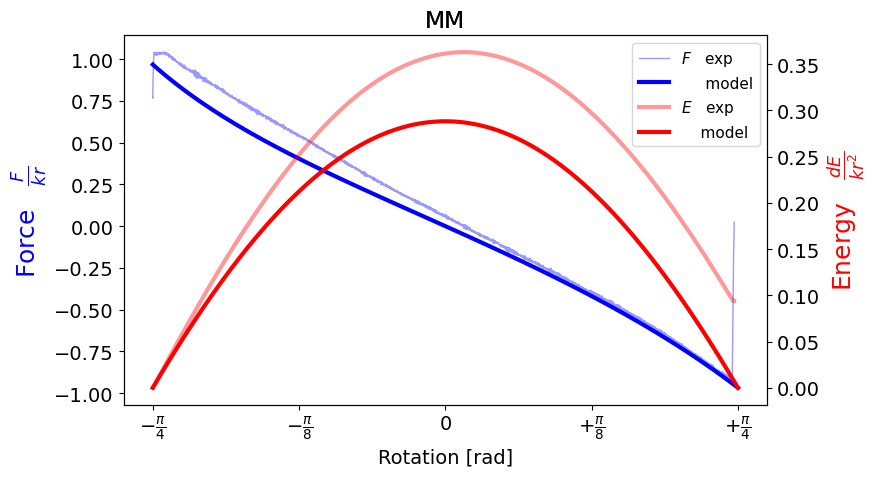

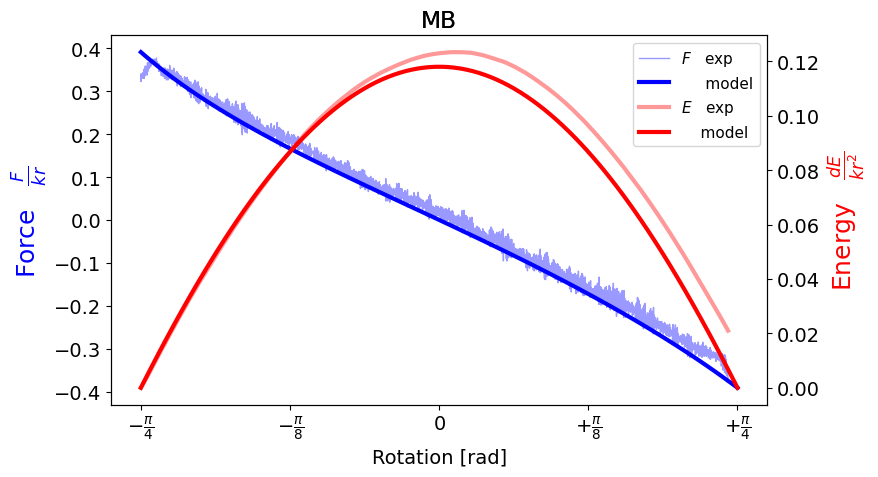

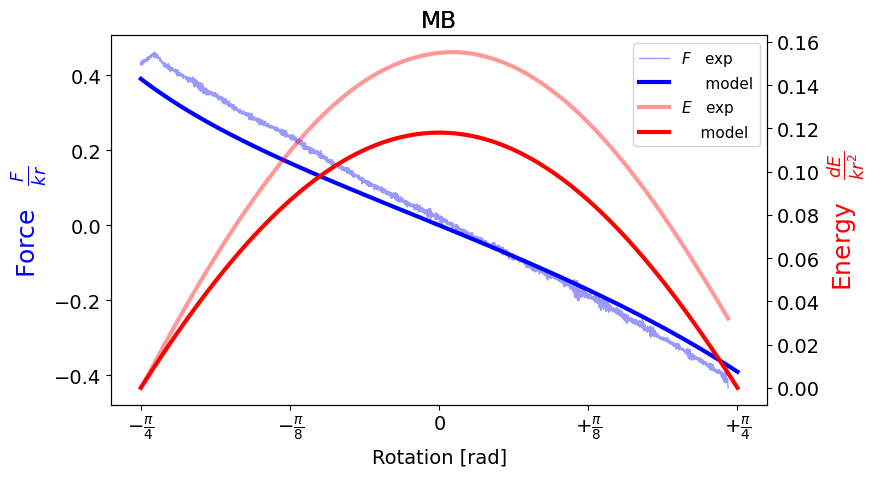

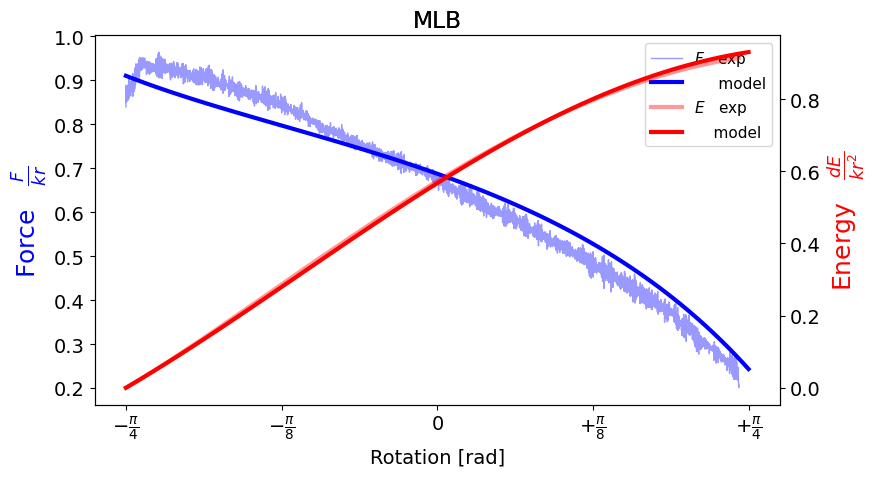

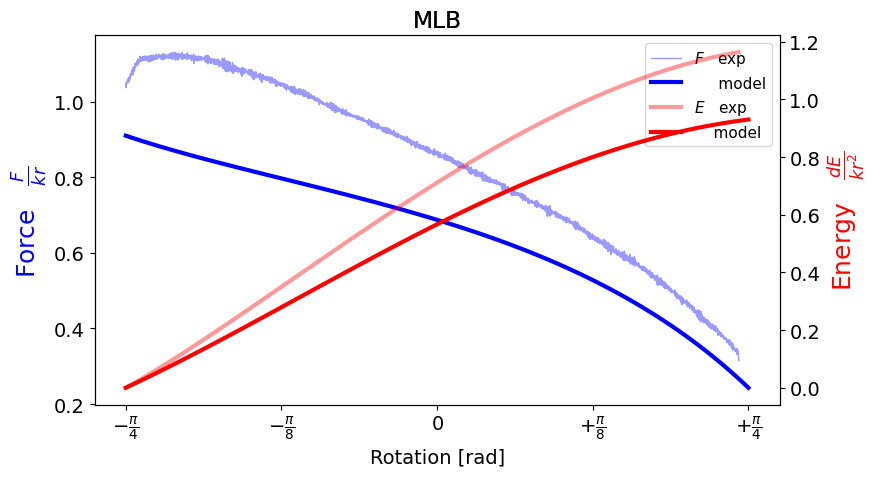

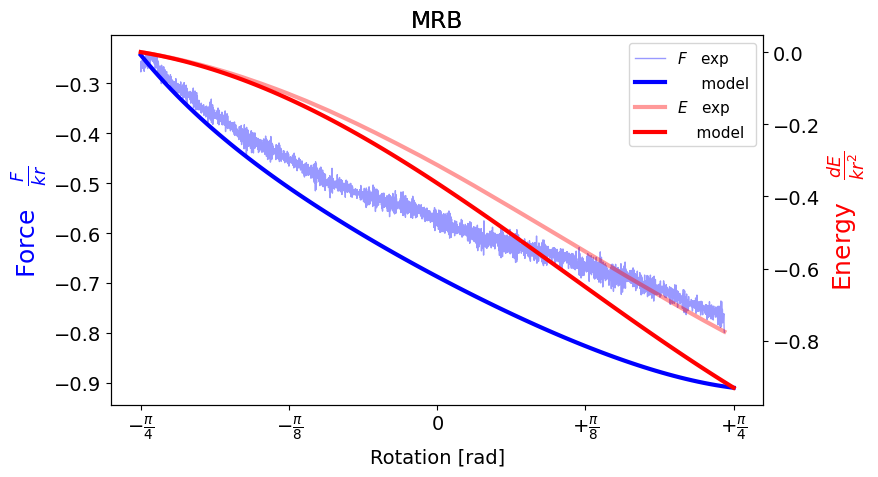

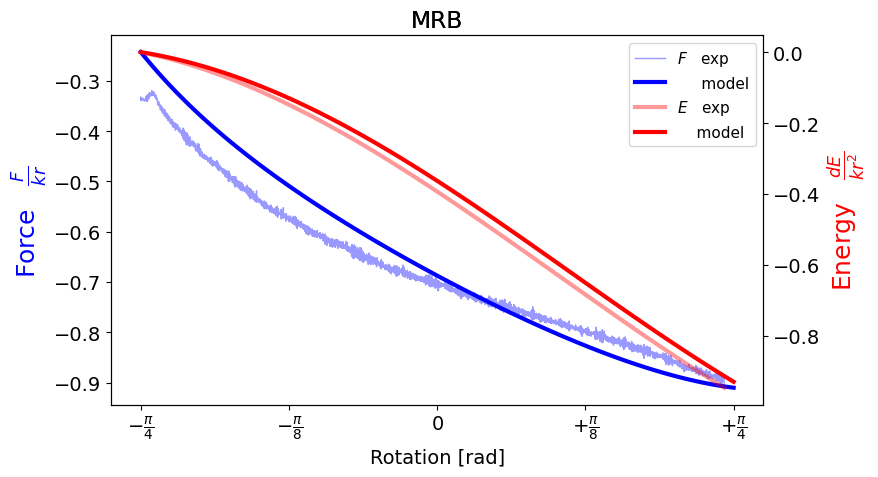

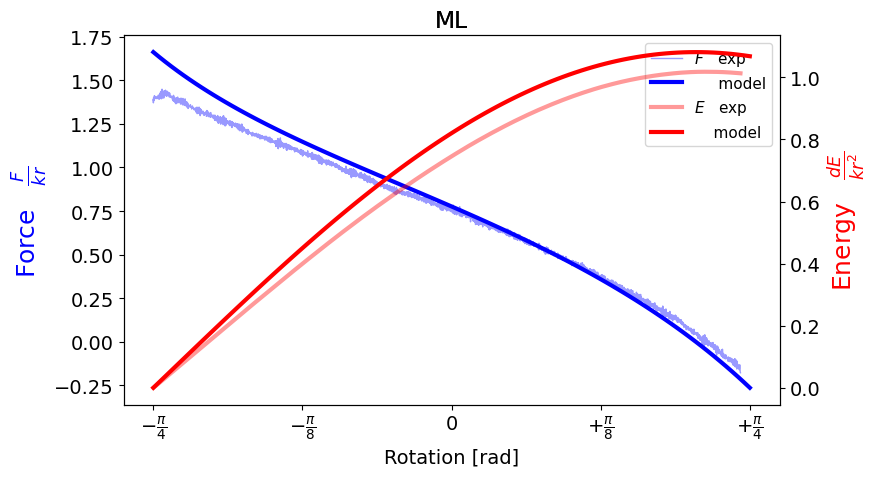

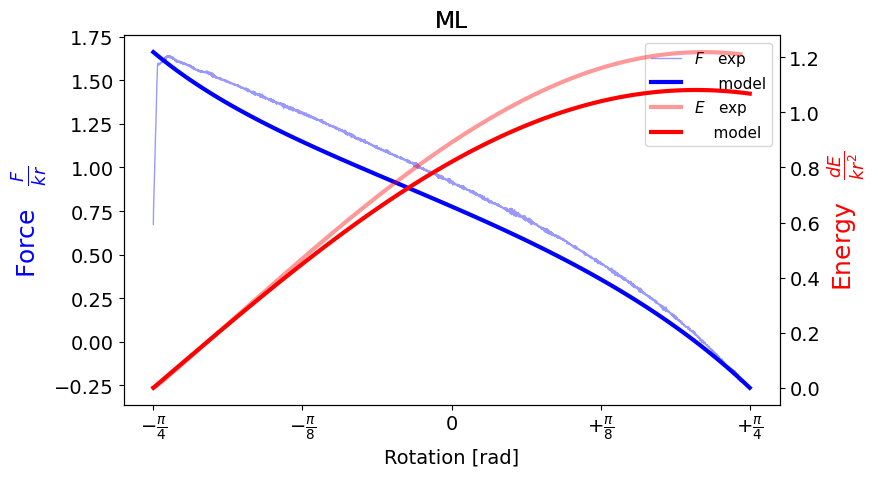

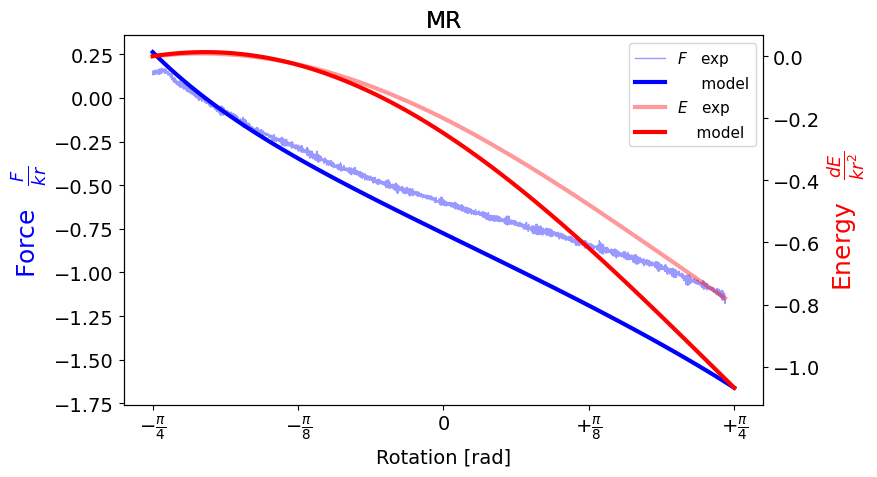

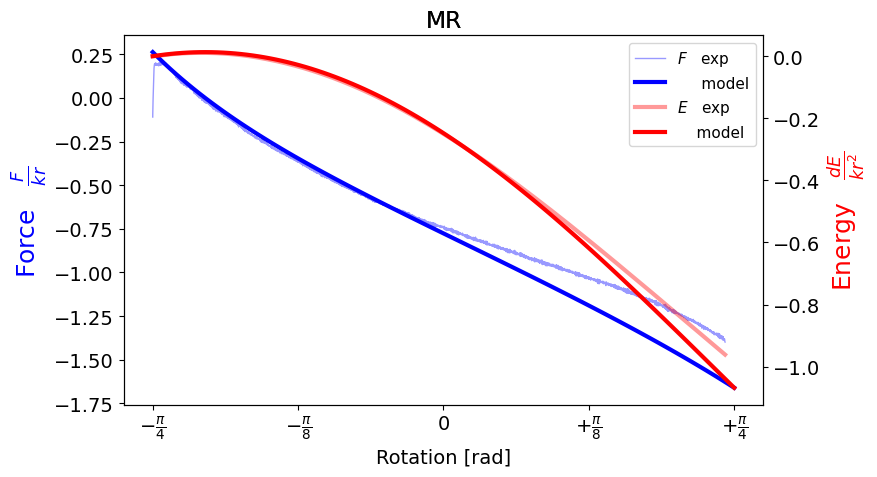

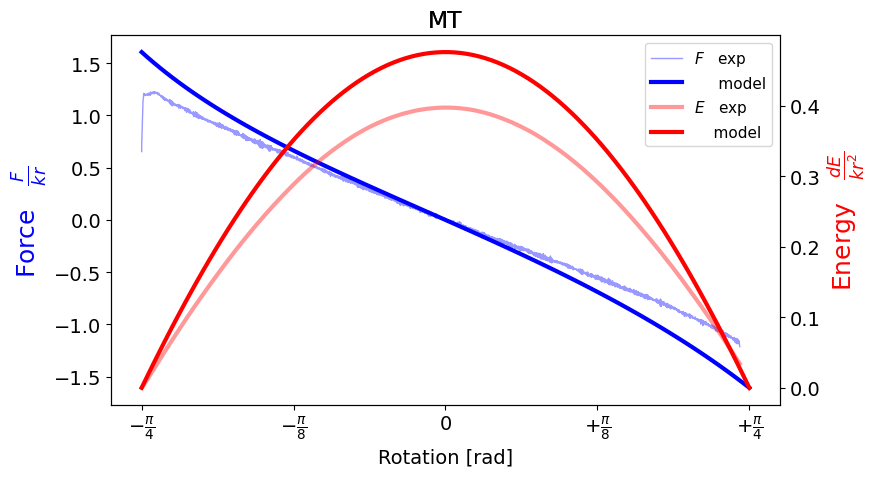

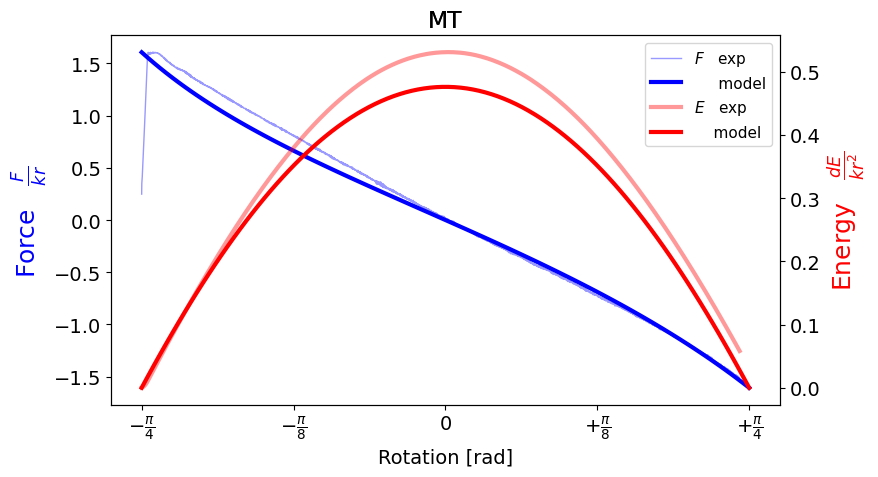

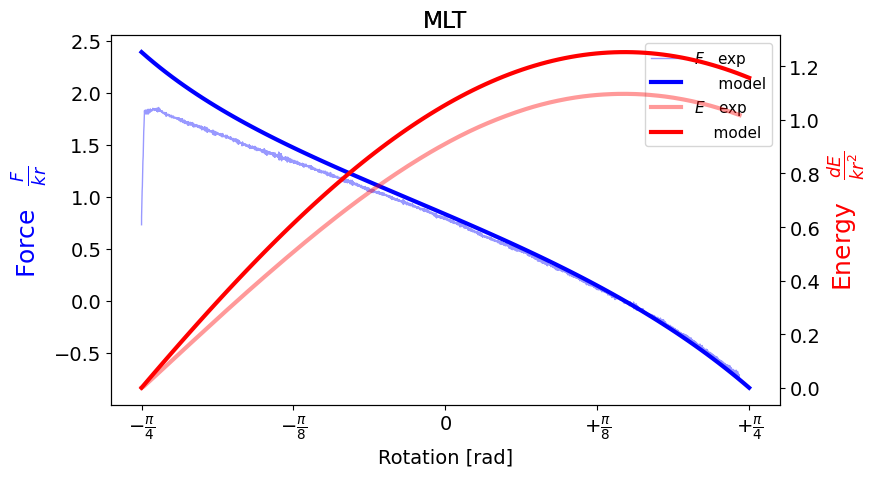

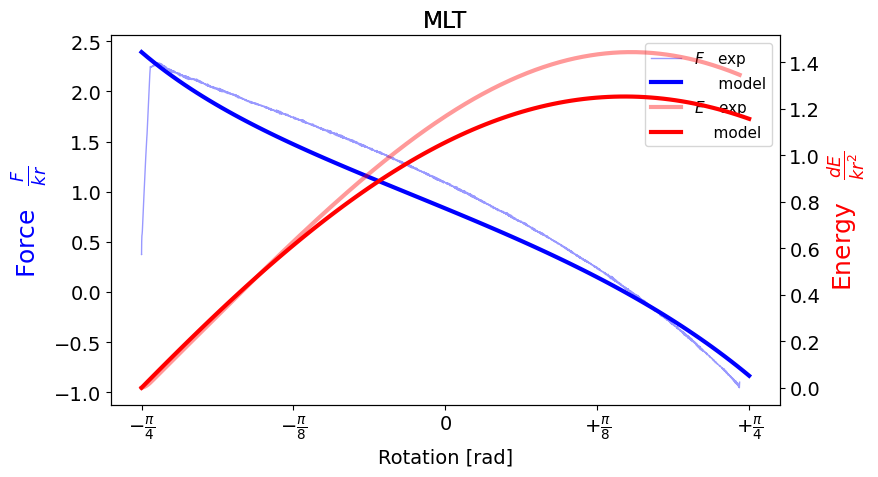

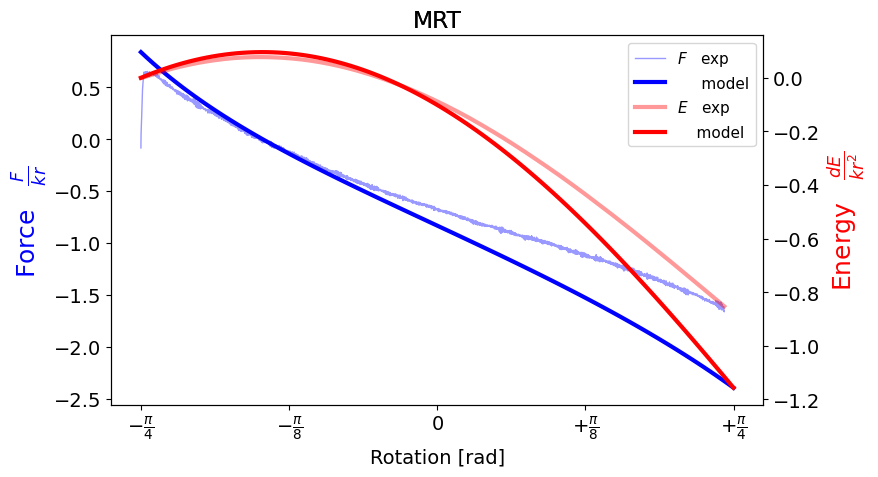

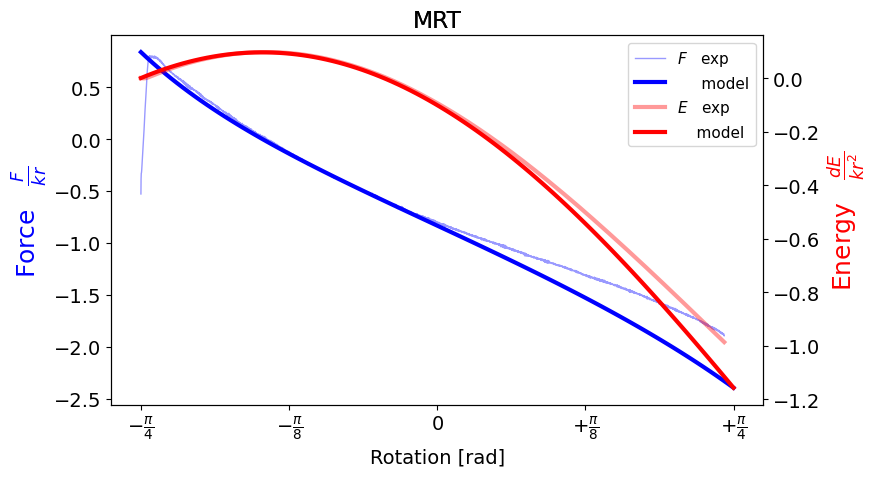

In [ ]:
units = ['1unit','1unit_','2unit','2unit_2']
unit1_id1 = ['MM','MB','MLB','MRB','ML','MR','MT','MLT','MRT']
id_p1 =[[10,0],[0,0],[0,15],[0,-15],[10,15],[10,-15],[20,0],[20,15],[20,-15]]
p0_1 = [-10,0]
l_bar = 70

def plot_energy_curves(paths: List[str], syst_error,k,r,l,id,id_p, **plot_kwargs):
    fig, axes = plt.subplots(figsize=(9, 5))
    font = {'size': 14}
    plt.rc('font', **font)

    F = []
    Theta = []
    U = []
    for file in paths:
        _, u, f = read_instron_data(file)
        U.append(u)
        theta = []
        for i in range(len(u)):
            theta.append(find_angle(r,l,u[i]))
        Theta.append(theta)
        F.append(f)

    mean_u, std_u = tolerant_mean(U)
    mean_theta, std_theta = tolerant_mean(Theta)
    #print(len(F[0]),len(syst_error))
    mean_f, std_f = tolerant_mean(F)
    mean_f -= syst_error[:len(mean_f)]
    E_exp = integrate.cumtrapz(mean_f, mean_u, initial=0)

    rotation = (np.linspace(-45,45,100))/180*np.pi
    F_y, E = calc_force(p0_1,id_p1[id_p],l_bar,r,k,rotation)

    ## set ticks to pi
    unit   = 0.125
    x_tick = np.arange(-0.25, 0.25+unit, unit)
    x_label = [r"$-\frac{\pi}{4}$", r"$-\frac{\pi}{8}$", r"$0$", r"$+\frac{\pi}{8}$",   r"$+\frac{\pi}{4}$"]
    axes.set_xticks(x_tick*np.pi)
    axes.set_xticklabels(x_label, fontsize=14)

    lns1 = axes.plot(mean_theta, mean_f/(k*r),color='blue',alpha = 0.4,lw=1, **plot_kwargs,label = r'$F$   exp')
    lns2 = axes.plot(rotation,F_y/(k*r),color='blue',lw =3,label = '     model')
    #axes.fill_between(mean_theta, mean_f-std_f, mean_f+std_f, alpha=0.1)
    axes.set(xlabel="Rotation [rad]", ylabel="Force [N]",title=id)
    axes.set_ylabel("Force   "+ r'$\frac{F}{kr}$', color = 'blue', fontsize=18)
    #axes.legend()
    axes2=axes.twinx()
    lns3 = axes2.plot(mean_theta, E_exp/(k*r**2),color='red',alpha = 0.4,lw =3,**plot_kwargs, label = r'$E$   exp')
    lns4 = axes2.plot(rotation,(E-E[0])/(k*r**2),color = 'red',lw=3,label = '    model')
    #axes2.legend()
   # axes.fill_between(mean_theta, mean_f-std_f, mean_f+std_f, alpha=0.1)
    axes2.set(xlabel="Rotation [rad]", ylabel="Energy",title=id)
    axes2.set_ylabel("Energy   " +r'$\frac{dE}{kr^2}$',color = 'red', fontsize=18)
    fig.tight_layout()

    lns = lns1+lns2+lns3+lns4
    labs = [l.get_label() for l in lns]
    axes.legend(lns, labs, loc=0, fontsize = 11)

    # fig, axes = plt.subplots(figsize=(9, 5))
    # axes.plot(mean_theta,np.gradient(E_exp,mean_u),color='blue',label = 'experiment')
    return F_y,mean_f,E,E_exp,mean_theta#,fig, axes

All_F = []
All_F_exp = []
All_E = []
All_E_exp = []
All_mean_theta = []
for idx, elem in enumerate(unit1_id1):
    unit1_data = sorted(list(Path(f'./1unit/1unit_{elem}.is_tcyclic_Exports').glob("*.txt")))
    unit1_1 = unit1_data[:3] #1 rubber band
    unit1_2 = unit1_data[3:6] #2 rubber bands
    print(elem)
    F,F_exp,E,E_exp, mean_theta = plot_energy_curves(unit1_1,unit1_friction,k_rubber, r,l_bar,elem,idx)
    All_F.append(F)
    All_F_exp.append(F_exp)
    All_E.append(E)
    All_E_exp.append(E_exp)
    All_mean_theta.append(mean_theta)
    F,F_exp,E,E_exp, mean_theta = plot_energy_curves(unit1_2,unit1_friction,2*k_rubber, r,l_bar,elem,idx)
    All_F.append(F)
    All_F_exp.append(F_exp)
    All_E.append(E)
    All_E_exp.append(E_exp)
    All_mean_theta.append(mean_theta)

(18, 100)


<ipython-input-17-96b6e85fbda5>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F_exp1 = np.array(All_F_exp[::2])
<ipython-input-17-96b6e85fbda5>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F_exp2 = np.array(All_F_exp[1::2])
<ipython-input-17-96b6e85fbda5>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F_exp_1f = np.array([

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

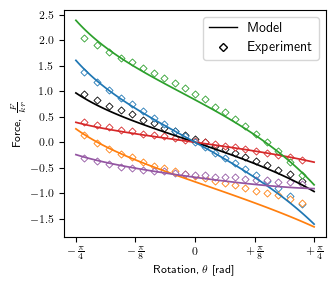

In [ ]:
print(np.array(All_F).shape)
F_2 = np.array(All_F[1::2])
F_1 = np.array(All_F[::2])
#E_1f = E_1[np.array([0,1,3,4])]/(k_rubber*r**2)
F_1f = np.array([F_1[0]/(k_rubber*r),F_1[1]/(k_rubber*r),F_1[7]/(k_rubber*r),F_1[6]/(k_rubber*r),F_1[5]/(k_rubber*r),F_1[3]/(k_rubber*r)])

F_exp1 = np.array(All_F_exp[::2])
F_exp2 = np.array(All_F_exp[1::2])

F_exp_av = [(data1.data[:2965]/(k_rubber*r)+data2.data[:2965]/(2*k_rubber*r))/2 for data1,data2 in zip(F_exp1[np.array([0,1,7,6,5,3])],F_exp2[np.array([0,1,7,6,5,3])])]
#E_exp_1f = E_exp1[np.array([0,1,3,4])]/(k_rubber*r**2)
F_exp_1f = np.array([F_exp1[0]/(k_rubber*r),F_exp1[1]/(k_rubber*r),F_exp2[3]/(2*k_rubber*r),F_exp2[4]/(2*k_rubber*r)])
theta1 = np.array(All_mean_theta[::2])
theta2 = np.array(All_mean_theta[1::2])
colors = ['black', '#d62728', '#2ca02c','#1f77b4','#ff7f0e','#9355A2']
slope = []


# fig, axes = plt.subplots(figsize=(6, 5))
fig, axes = plt.subplots(figsize=(3.4, 2.9))


# Adjust font size and style for LaTeX rendering
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'font.family':'sans-serif',  # Choose appropriate font family
})

for i in range(len(F_1f)):
    #slope.append(np.gradient(E_1f[i]-E_1f[i,0]))
    axes.scatter(mean_theta[80::140],F_exp_av[i][80::140],lw = 0.6, alpha =1,marker = 'D',s=13, edgecolors = colors[i], c = 'white')
    axes.plot(rotation,F_1f[i],lw = 1.25, color = colors[i])
    #axes.plot(mean_theta[:2960],E_exp_1f[i][:2960],lw = 2.5, alpha =0.35, color = colors[i])

    #axes.legend([r'$p_1 = (2,1)$',r'$p_1=(2,-1)$',r'$p_1 = (3,1)$',r'$p_1 = (3,-1)$'],fontsize = 13)
    #axes.legend(['TM','TL','TR','TT','TTL','TTR'])
    #axes.fill_between(mean_theta, mean_f-std_f, mean_f+std_f, alpha=0.1)

## set ticks to pi
unit   = 0.125
x_tick = np.arange(-0.25, 0.25+unit, unit)
x_label = [r"$-\frac{\pi}{4}$", r"$-\frac{\pi}{8}$", r"$0$", r"$+\frac{\pi}{8}$",   r"$+\frac{\pi}{4}$"]
axes.set_xticks(x_tick*np.pi)
#axes.set_xticklabels(x_label, fontsize=18)
axes.set_xticklabels(x_label)

## set legend ##
custom_lines = [Line2D([0], [0], color='black', lw=1),
                Line2D([0], [0],marker = 'D',markersize=4.5, color = 'black',linestyle='None',fillstyle='none',alpha=1, lw=0.4)]
#axes.legend(custom_lines, ['Model', 'Experiment'],fontsize =11)
axes.legend(custom_lines, ['Model', 'Experiment'],fontsize = 10)

# for i in range(len(E_exp1)):
#     axes.plot(theta1[i], E_exp1[i],lw = 1,alpha = 0.4)
axes.set(xlabel= "Rotation,   " +r"$\theta$"+" [rad]",ylabel="Force")
axes.set_ylabel("Force,   " +r'$\frac{F}{kr}$')


plt.tight_layout()
fig.savefig(r'./1unit_force_mid_6cases.pdf', dpi=600)

plt.plot

(18, 100)
(6, 100)


<ipython-input-18-d84fbe140c31>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  E_exp1 = np.array(All_E_exp[::2])
<ipython-input-18-d84fbe140c31>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  E_exp2 = np.array(All_E_exp[1::2])
<ipython-input-18-d84fbe140c31>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  E_exp_1f = np.array([

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

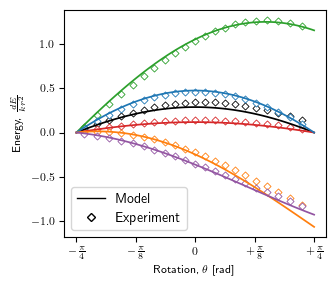

In [ ]:
print(np.array(All_E).shape)
E_2 = np.array(All_E[1::2])
E_1 = np.array(All_E[::2])
#E_1f = E_1[np.array([0,1,3,4])]/(k_rubber*r**2)
E_1f = np.array([E_1[0]/(k_rubber*r**2),E_1[1]/(k_rubber*r**2),E_1[7]/(k_rubber*r**2),E_1[6]/(k_rubber*r**2),E_1[5]/(k_rubber*r**2),E_1[3]/(k_rubber*r**2)])
print(E_1f.shape)
E_exp1 = np.array(All_E_exp[::2])
E_exp2 = np.array(All_E_exp[1::2])

E_exp_av = [(data1.data[:2965]/(k_rubber*r**2)+data2.data[:2965]/(2*k_rubber*r**2))/2 for data1,data2 in zip(E_exp1[np.array([0,1,7,6,5,3])],E_exp2[np.array([0,1,7,6,5,3])])]

#E_exp_1f = E_exp1[np.array([0,1,3,4])]/(k_rubber*r**2)
E_exp_1f = np.array([E_exp1[0]/(k_rubber*r**2),E_exp1[1]/(k_rubber*r**2),E_exp2[3]/(2*k_rubber*r**2),E_exp2[4]/(2*k_rubber*r**2)])
theta1 = np.array(All_mean_theta[::2])
theta2 = np.array(All_mean_theta[1::2])
colors = ['black', '#d62728', '#2ca02c','#1f77b4','#ff7f0e','#9355A2']
slope = []

plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'font.family':'sans-serif',  # Choose appropriate font family
})

fig, axes = plt.subplots(figsize=(3.4, 2.9))
for i in range(len(E_1f)):
    #slope.append(np.gradient(E_1f[i]-E_1f[i,0]))
    axes.scatter(mean_theta[80::140],E_exp_av[i][80::140],lw = 0.6,s=13, alpha =1,marker = 'D', edgecolors = colors[i], c = 'white')
    axes.plot(rotation,E_1f[i]-E_1f[i,0],lw = 1.25, color = colors[i])
    #axes.plot(mean_theta[:2960],E_exp_1f[i][:2960],lw = 2.5, alpha =0.35, color = colors[i])

    #axes.legend([r'$p_1 = (2,1)$',r'$p_1=(2,-1)$',r'$p_1 = (3,1)$',r'$p_1 = (3,-1)$'],fontsize = 13)
    #axes.legend(['TM','TL','TR','TT','TTL','TTR'])
    #axes.fill_between(mean_theta, mean_f-std_f, mean_f+std_f, alpha=0.1)

## set ticks to pi
unit   = 0.125
x_tick = np.arange(-0.25, 0.25+unit, unit)
x_label = [r"$-\frac{\pi}{4}$", r"$-\frac{\pi}{8}$", r"$0$", r"$+\frac{\pi}{8}$",   r"$+\frac{\pi}{4}$"]
axes.set_xticks(x_tick*np.pi)
axes.set_xticklabels(x_label)

## set legend ##
custom_lines = [Line2D([0], [0], color='black', lw=1),
                Line2D([0], [0],marker = 'D', markersize=4.5, color = 'black',linestyle='None',fillstyle='none',alpha=1, lw=0.8)]
axes.legend(custom_lines, ['Model', 'Experiment'],fontsize =10)

# for i in range(len(E_exp1)):
#     axes.plot(theta1[i], E_exp1[i],lw = 1,alpha = 0.4)
axes.set(xlabel= "Rotation,   " +r"$\theta$"+" [rad]",ylabel="Energy")
axes.set_ylabel("Energy,   " +r'$\frac{dE}{kr^2}$')

plt.tight_layout()
fig.savefig(r'./1unit_energy_mid_6cases.pdf', dpi=600)

plt.plot


## 1 unit p_in = [0,0] mm

TM
TL
TR
TT
TTL
TTR


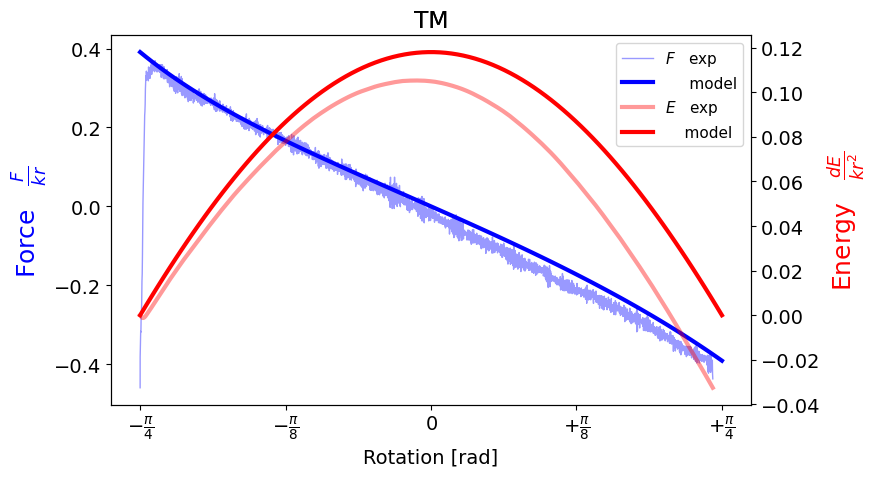

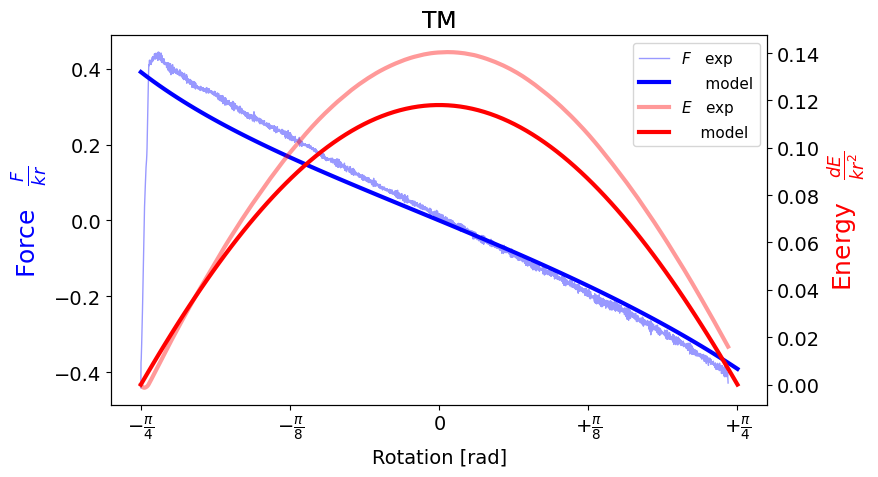

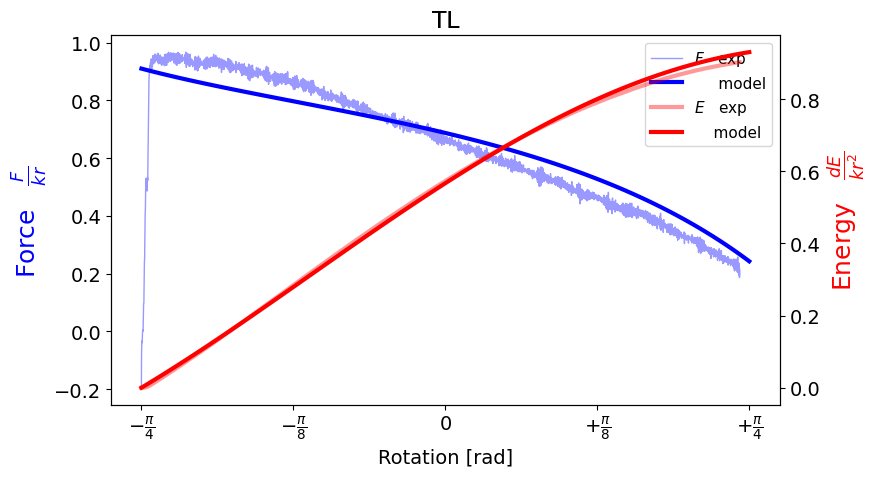

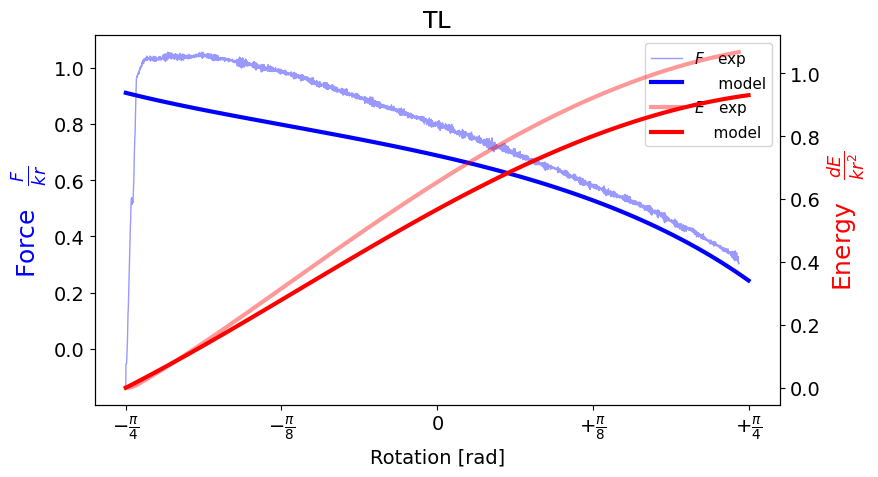

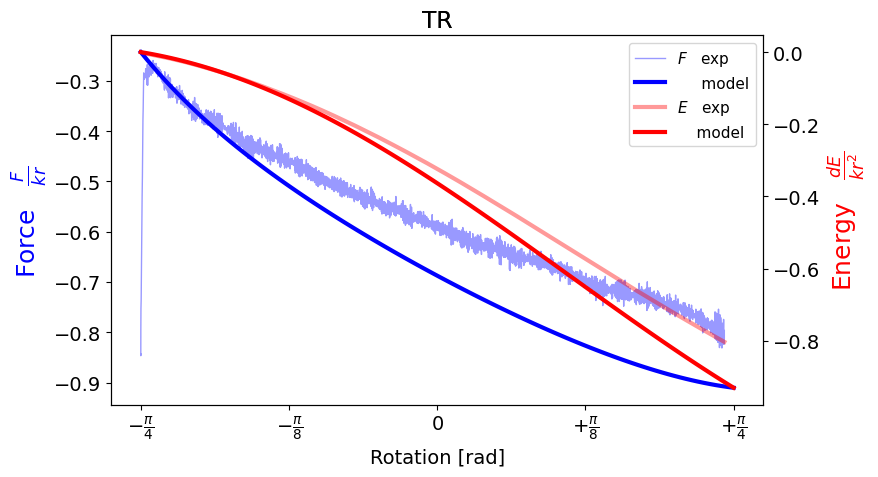

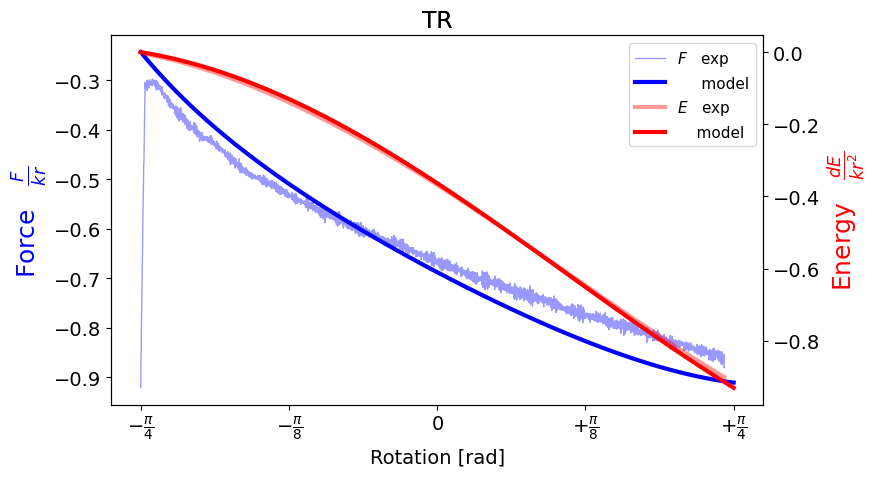

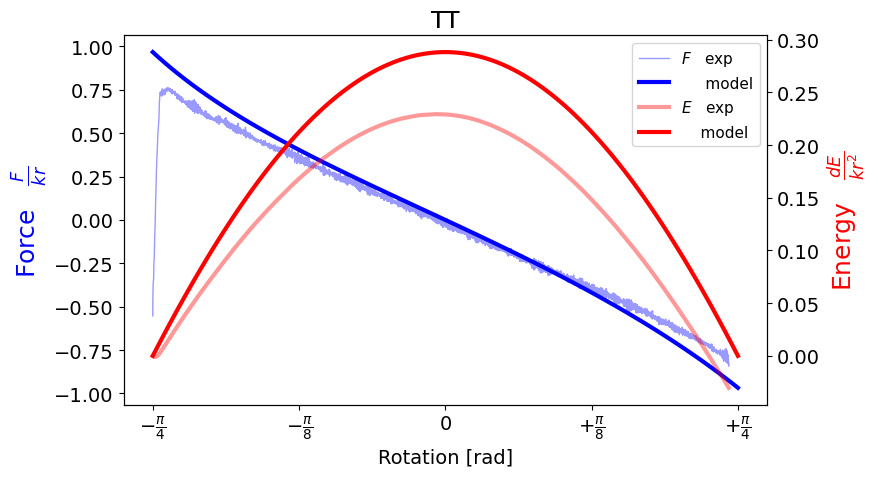

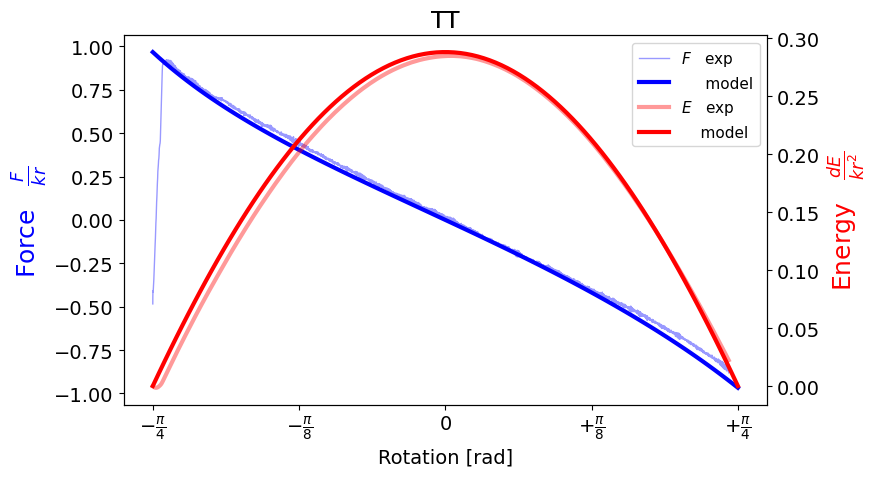

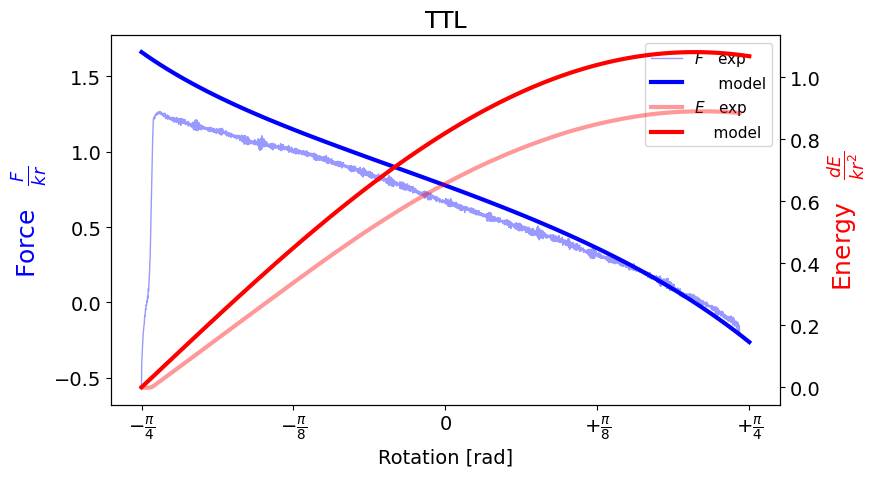

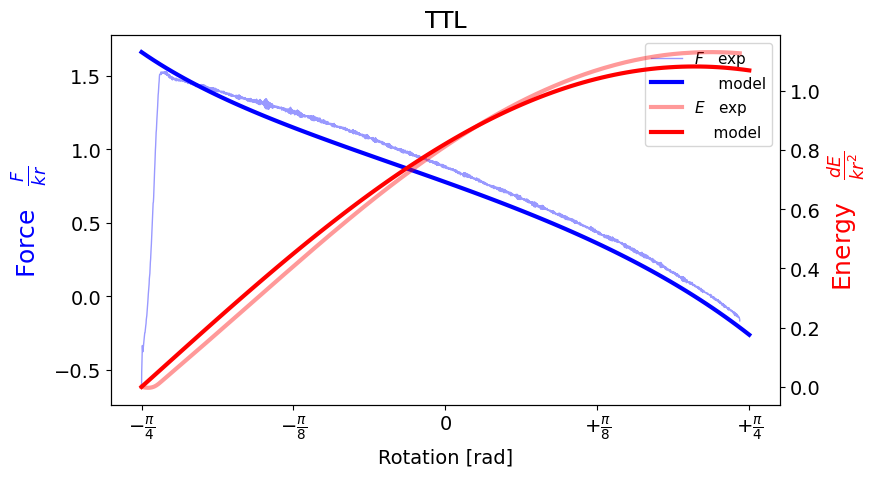

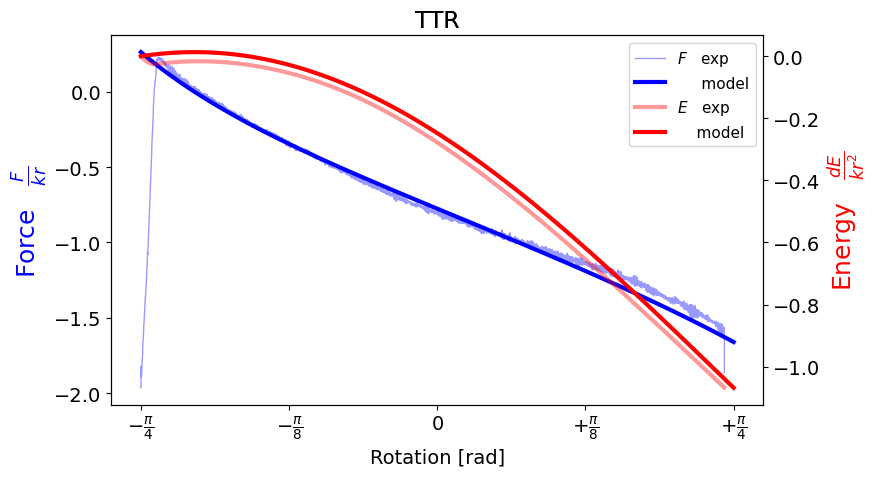

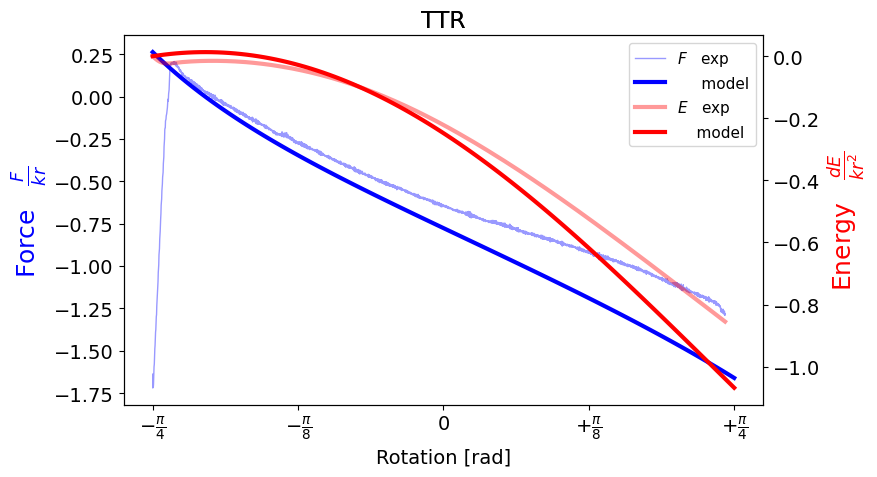

In [ ]:
units = ['1unit','1unit_','2unit','2unit_2']
unit1_id2 = ['TM','TL','TR','TT','TTL','TTR']
id_p1 =[[10,0],[10,15],[10,-15],[20,0],[20,15],[20,-15]]
p0_1 = [0,0]
l_bar = 70

All_E = []
All_E_exp = []
All_mean_theta = []
All_F_exp = []
All_F = []

for idx, elem in enumerate(unit1_id2):
    unit1_data = sorted(list(Path(f'./1unit_2/1unit_{elem}.is_tcyclic_Exports').glob("*.txt")))
    unit1_1 = unit1_data[:3] #1 rubber band
    unit1_2 = unit1_data[3:6] #2 rubber bands
    print(elem)
    F,F_exp,E,E_exp, mean_theta = plot_energy_curves(unit1_1,unit1_friction,k_rubber, r,l_bar,elem,idx)
    All_F.append(F)
    All_F_exp.append(F_exp)
    All_E.append(E)
    All_E_exp.append(E_exp)
    All_mean_theta.append(mean_theta)
    F,F_exp,E,E_exp, mean_theta = plot_energy_curves(unit1_2,unit1_friction,2*k_rubber, r,l_bar,elem,idx)
    All_E.append(E)
    All_E_exp.append(E_exp)
    All_F.append(F)
    All_F_exp.append(F_exp)
    All_mean_theta.append(mean_theta)


(12, 100)


<ipython-input-24-fbf8de1afef0>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F_exp1 = np.array(All_F_exp[::2])
<ipython-input-24-fbf8de1afef0>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F_exp2 = np.array(All_F_exp[1::2])
<ipython-input-24-fbf8de1afef0>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F_exp_1f = np.array([

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

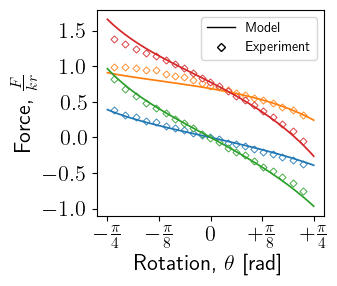

In [ ]:
print(np.array(All_F).shape)
F_2 = np.array(All_F[1::2])
F_1 = np.array(All_F[::2])
#E_1f = E_1[np.array([0,1,3,4])]/(k_rubber*r**2)
F_1f = np.array([F_1[0]/(k_rubber*r),F_1[1]/(k_rubber*r),F_2[3]/(2*k_rubber*r),F_2[4]/(2*k_rubber*r)])

F_exp1 = np.array(All_F_exp[::2])
F_exp2 = np.array(All_F_exp[1::2])

F_exp_av = [(data1.data[:2965]/(k_rubber*r)+data2.data[:2965]/(2*k_rubber*r))/2 for data1,data2 in zip(F_exp1[np.array([0,1,3,4])],F_exp2[np.array([0,1,3,4])])]
#E_exp_1f = E_exp1[np.array([0,1,3,4])]/(k_rubber*r**2)
F_exp_1f = np.array([F_exp1[0]/(k_rubber*r),F_exp1[1]/(k_rubber*r),F_exp2[3]/(2*k_rubber*r),F_exp2[4]/(2*k_rubber*r)])
theta1 = np.array(All_mean_theta[::2])
theta2 = np.array(All_mean_theta[1::2])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
slope = []


# fig, axes = plt.subplots(figsize=(6, 5))
fig, axes = plt.subplots(figsize=(3.4, 2.9))


# Adjust font size and style for LaTeX rendering
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'font.family':'sans-serif',  # Choose appropriate font family
})

for i in range(len(F_1f)):
    #slope.append(np.gradient(E_1f[i]-E_1f[i,0]))
    axes.scatter(mean_theta[80::140],F_exp_av[i][80::140],lw = 0.6, alpha =1,marker = 'D',s=13, edgecolors = colors[i], c = 'white')
    axes.plot(rotation,F_1f[i],lw = 1.25, color = colors[i])
    #axes.plot(mean_theta[:2960],E_exp_1f[i][:2960],lw = 2.5, alpha =0.35, color = colors[i])

    #axes.legend([r'$p_1 = (2,1)$',r'$p_1=(2,-1)$',r'$p_1 = (3,1)$',r'$p_1 = (3,-1)$'],fontsize = 13)
    #axes.legend(['TM','TL','TR','TT','TTL','TTR'])
    #axes.fill_between(mean_theta, mean_f-std_f, mean_f+std_f, alpha=0.1)

## set ticks to pi
unit   = 0.125
x_tick = np.arange(-0.25, 0.25+unit, unit)
x_label = [r"$-\frac{\pi}{4}$", r"$-\frac{\pi}{8}$", r"$0$", r"$+\frac{\pi}{8}$",   r"$+\frac{\pi}{4}$"]
axes.set_xticks(x_tick*np.pi)
#axes.set_xticklabels(x_label, fontsize=18)
axes.set_xticklabels(x_label)

## set legend ##
custom_lines = [Line2D([0], [0], color='black', lw=1),
                Line2D([0], [0],marker = 'D',markersize=4.5, color = 'black',linestyle='None',fillstyle='none',alpha=1, lw=0.4)]
#axes.legend(custom_lines, ['Model', 'Experiment'],fontsize =11)
axes.legend(custom_lines, ['Model', 'Experiment'],fontsize = 10)

# for i in range(len(E_exp1)):
#     axes.plot(theta1[i], E_exp1[i],lw = 1,alpha = 0.4)
axes.set(xlabel= "Rotation,   " +r"$\theta$"+" [rad]",ylabel="Force")
axes.set_ylabel("Force,   " +r'$\frac{F}{kr}$')


plt.tight_layout()
fig.savefig(r'./1unit_force.pdf', dpi=600)

plt.plot


(12, 100)
(4, 100)


<ipython-input-22-990e4acae24f>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  E_exp1 = np.array(All_E_exp[::2])
<ipython-input-22-990e4acae24f>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  E_exp2 = np.array(All_E_exp[1::2])
<ipython-input-22-990e4acae24f>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  E_exp_1f = np.array([

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

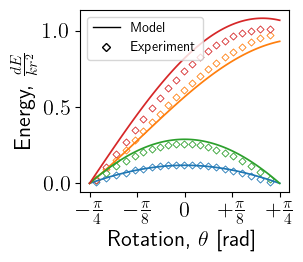

In [ ]:


print(np.array(All_E).shape)
E_2 = np.array(All_E[1::2])
E_1 = np.array(All_E[::2])
#E_1f = E_1[np.array([0,1,3,4])]/(k_rubber*r**2)
E_1f = np.array([E_1[0]/(k_rubber*r**2),E_1[1]/(k_rubber*r**2),E_2[3]/(2*k_rubber*r**2),E_2[4]/(2*k_rubber*r**2)])
print(E_1f.shape)
E_exp1 = np.array(All_E_exp[::2])
E_exp2 = np.array(All_E_exp[1::2])

E_exp_av = [(data1.data[:2965]/(k_rubber*r**2)+data2.data[:2965]/(2*k_rubber*r**2))/2 for data1,data2 in zip(E_exp1[np.array([0,1,3,4])],E_exp2[np.array([0,1,3,4])])]

#E_exp_1f = E_exp1[np.array([0,1,3,4])]/(k_rubber*r**2)
E_exp_1f = np.array([E_exp1[0]/(k_rubber*r**2),E_exp1[1]/(k_rubber*r**2),E_exp2[3]/(2*k_rubber*r**2),E_exp2[4]/(2*k_rubber*r**2)])
theta1 = np.array(All_mean_theta[::2])
theta2 = np.array(All_mean_theta[1::2])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
slope = []

plt.rcParams.update({
    'font.size': 16,
    'text.usetex': True,
    'font.family':'sans-serif',  # Choose appropriate font family
})

fig, axes = plt.subplots(figsize=(3.4, 2.9))
for i in range(len(E_1f)):
    #slope.append(np.gradient(E_1f[i]-E_1f[i,0]))
    axes.scatter(mean_theta[80::140],E_exp_av[i][80::140],lw = 0.6,s=13, alpha =1,marker = 'D', edgecolors = colors[i], c = 'white')
    axes.plot(rotation,E_1f[i]-E_1f[i,0],lw = 1.25, color = colors[i])
    #axes.plot(mean_theta[:2960],E_exp_1f[i][:2960],lw = 2.5, alpha =0.35, color = colors[i])

    #axes.legend([r'$p_1 = (2,1)$',r'$p_1=(2,-1)$',r'$p_1 = (3,1)$',r'$p_1 = (3,-1)$'],fontsize = 13)
    #axes.legend(['TM','TL','TR','TT','TTL','TTR'])
    #axes.fill_between(mean_theta, mean_f-std_f, mean_f+std_f, alpha=0.1)

## set ticks to pi
unit   = 0.125
x_tick = np.arange(-0.25, 0.25+unit, unit)
x_label = [r"$-\frac{\pi}{4}$", r"$-\frac{\pi}{8}$", r"$0$", r"$+\frac{\pi}{8}$",   r"$+\frac{\pi}{4}$"]
axes.set_xticks(x_tick*np.pi)
axes.set_xticklabels(x_label)

## set legend ##
custom_lines = [Line2D([0], [0], color='black', lw=1),
                Line2D([0], [0],marker = 'D', markersize=4.5, color = 'black',linestyle='None',fillstyle='none',alpha=1, lw=0.8)]
axes.legend(custom_lines, ['Model', 'Experiment'],fontsize =10)

# for i in range(len(E_exp1)):
#     axes.plot(theta1[i], E_exp1[i],lw = 1,alpha = 0.4)
axes.set(xlabel= "Rotation,   " +r"$\theta$"+" [rad]",ylabel="Energy")
axes.set_ylabel("Energy,   " +r'$\frac{dE}{kr^2}$')

plt.tight_layout()
fig.savefig(r'./1unit_energy.pdf', dpi=600)

plt.plot



# energy landscape

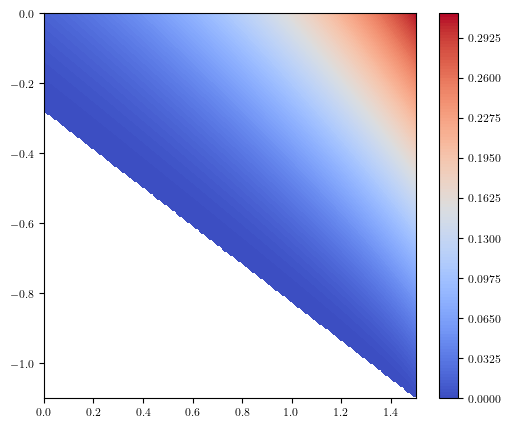

In [ ]:


def get_energy_barrier2(p0,p1,l,r,k,theta):
    #print(p1)
    monostable_mark = 0
    f,E = calc_force(p0,p1,l,r,k,theta)
    #plt.plot(theta,(E-E[0])/(k*r**2))
    #plt.ylim((1.4,1.7))
    #plt.xlim((0.5,0.8))
    E_max = np.max(E-E[0])/(k*r**2)
    #print(E_max)
    #print(E)
    #if E_max == 0 or E_max == (E[-1]-E[0])/(k*r**2):
    if E_max <= 0:
        monostable_mark = 1
        #print(p1)
    #print(monostable_mark)
    #print(E[-1])
    return E_max, monostable_mark

l0_rubber = 10
N = 200
Y = (np.linspace(-1.1*r,0*r,N))
X = (np.linspace(0.0*r,1.5*r,N))
x,y = np.meshgrid(X,Y)
E_bar = np.zeros((N,N))
monostable_mask = np.zeros((N,N))


1.0 0.0 -15.0
1.0 0.0 -14.849246231155778
1.0 0.0 -14.698492462311558
1.0 0.0 -14.547738693467338
1.0 0.0 -14.396984924623116
1.0 0.0 -14.246231155778894
1.0 0.0 -14.095477386934673
1.0 0.0 -13.944723618090453
1.0 0.0 -13.793969849246231
1.0 0.0 -13.64321608040201
1.0 0.0 -13.492462311557789
1.0 0.0 -13.341708542713569
1.0 0.0 -13.190954773869347
1.0 0.0 -13.040201005025125
1.0 0.0 -12.889447236180905
1.0 0.0 -12.738693467336685
1.0 0.0 -12.587939698492463
1.0 0.0 -12.43718592964824
1.0 0.0 -12.28643216080402
1.0 0.0 -12.1356783919598
1.0 0.0 -11.984924623115578
1.0 0.0 -11.834170854271356
1.0 0.0 -11.683417085427136
1.0 0.0 -11.532663316582916
1.0 0.0 -11.381909547738694
1.0 0.0 -11.231155778894472
1.0 0.0 -11.080402010050252
1.0 0.0 -10.929648241206031
1.0 0.0 -10.77889447236181
1.0 0.0 -10.628140703517587
1.0 0.0 -10.477386934673367
1.0 0.0 -10.326633165829147
1.0 0.0 -10.175879396984925
1.0 0.0 -10.025125628140703
1.0 0.0 -9.874371859296483
1.0 0.10050251256281408 -15.0
1.0 0.10050

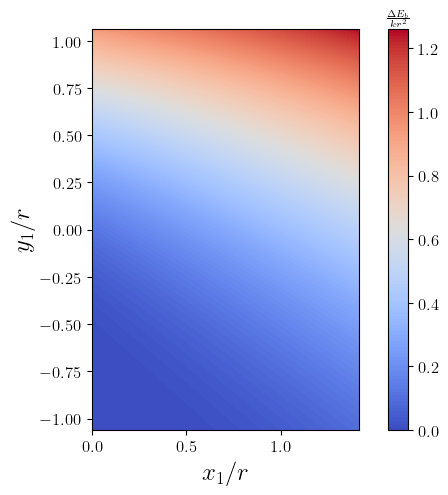

In [ ]:


l0_rubber = 10
N = 200
Y = (np.linspace(-15,15,N))
X = (np.linspace(0.0,20,N))
x,y = np.meshgrid(X,Y)
E_bar = np.zeros((N,N))
monostable_mask = np.zeros((N,N))
#print(x)
#print(y)


# Adjust font size and style for LaTeX rendering
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'font.family':'sans-serif',  # Choose appropriate font family
})

#print(x.shape)
for i in range(N):
    for j in range(N):
        E_bar[i,j], monostable_mask[i,j] = get_energy_barrier2([-10,0],[X[i],Y[j]],l_bar,r,k_rubber,rotation)
        if monostable_mask[i,j] == 1:
            print(monostable_mask[i,j],X[i],Y[j])
#print(E_bar)
#print(monostable_mask)
E_bar_masked = np.ma.array(E_bar, mask=monostable_mask)
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_aspect('equal', 'box')
cp = plt.contourf(x/r, y/r, E_bar.T,150,cmap = 'coolwarm')
clb = plt.colorbar(cp)
clb.ax.set_title(r"$\frac{\Delta E_b}{k r^2}$")
clb.ax.tick_params(labelsize=12)
clb.set_ticks([0.0,0.2,0.4,0.6,0.8,1.0,1.2])
plt.xlabel(r"$x_1/r$", fontsize=18)
plt.ylabel(r"$y_1/r$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.set(xlabel= r"$x_1/r$",ylabel= r"$y_1/r$")

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
plt.tight_layout()
fig.savefig(r'./1unit_EnergyLandscap_mid.pdf', dpi=600)

plt.show()

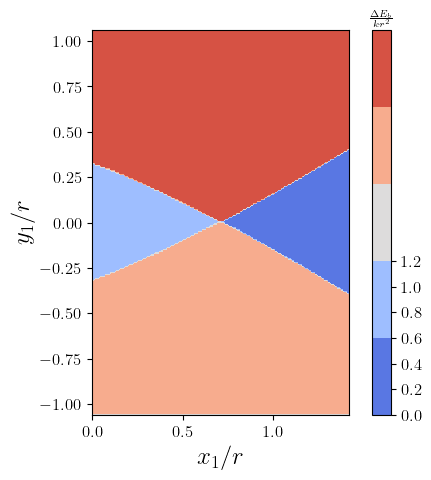

In [ ]:
path_idx = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if E_bar.T[i,j] < E_bar.T[100,100]:
            if E_bar.T[-i,j] < E_bar.T[100,100]:
                path_idx[i,j] = 1
            else:
                path_idx[i,j] = 2
        else:
            if E_bar.T[-i,j] < E_bar.T[100,100]:
                path_idx[i,j] = 3
            else:
                path_idx[i,j] = 0



fig, ax = plt.subplots(figsize=(6, 5))
ax.set_aspect('equal', 'box')
cp = plt.contourf(x/r, y/r, path_idx,4,cmap = 'coolwarm')
clb = plt.colorbar(cp)
clb.ax.set_title(r"$\frac{\Delta E_b}{k r^2}$")
clb.ax.tick_params(labelsize=12)
clb.set_ticks([0.0,0.2,0.4,0.6,0.8,1.0,1.2])
plt.xlabel(r"$x_1/r$", fontsize=18)
plt.ylabel(r"$y_1/r$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.set(xlabel= r"$x_1/r$",ylabel= r"$y_1/r$")



plt.show()


# Friction

1.8980238954354245
1.6599557992984348


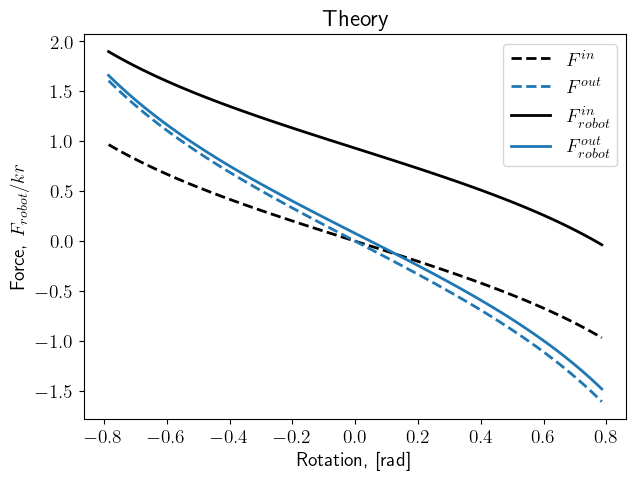

In [ ]:
p0_fric = [-10,0]
p1_in = [10,0]
p1_out = [20,0] #### change between [15,0] and [20,0]
l_bar = 70
r = 10*np.sqrt(2)
l0_rubber = 10

rotation = (np.linspace(-45,45,100))/180*np.pi
k5 = 0.030
mg1 = 9.81*0.00
dx = np.sqrt(200)*(np.sin(rotation)-np.sin(rotation[0]))

F_in, E_in = calc_force(p0_fric,p1_in,l_bar,r,k5,rotation)
F_out, E_out = calc_force(p0_fric,p1_out,l_bar,r,k5,rotation)

fig, axes = plt.subplots(figsize=(7, 5))
axes.plot(rotation,F_in/(k5*r),color = 'black',lw = 2, linestyle='--')
axes.plot(rotation,F_out/(k5*r),color = '#1f77b4',lw = 2, linestyle='--')
F_leg = -0.0066*9.81*(40+dx)/(4*np.sqrt(35**2-(0.5*(dx+40))**2))
F_f = 0.79 #### 0.39 (MDF) #### 0.79 (rubber)

print((F_f/2+F_in[0])/(k5*r))
print((F_out[0]-F_leg[0])/(k5*r))

axes.plot(rotation,(F_f/2+F_in)/(k5*r),color = 'black',lw = 2)
axes.plot(rotation,(F_out-F_leg)/(k5*r),color = '#1f77b4',lw = 2)

axes.set(xlabel="Rotation, [rad]",ylabel="Force, $F_{robot}/kr$",title='Theory')
axes.legend(['$F^{in}$','$F^{out}$','$F^{in}_{robot}$','$F^{out}_{robot}$'])

plt.plot
fig.savefig(r'./fric_rubber_k.pdf', dpi=600)


0.6475516521281137
1.0289635213552886
1.0233086710884585


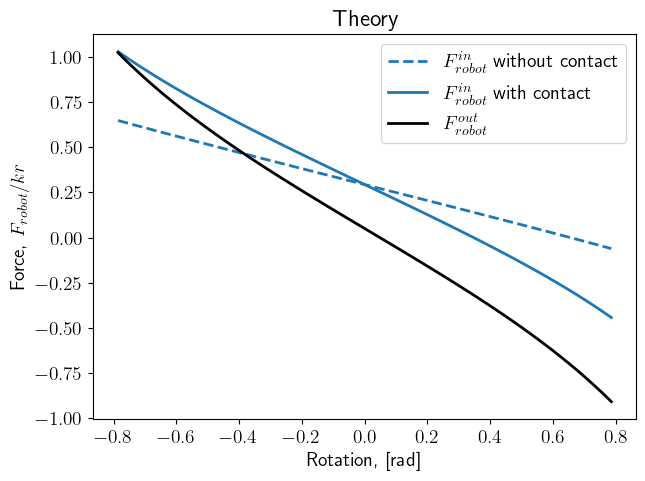

In [ ]:
p0_fric = [-10,0]
p1_in = [7,0] #[7,0] no contact #### [12.6,0] contact
p1_in2 = [13,0]
p1_out = [20,0]
l_bar = 70
r = 10*np.sqrt(2)
l0_rubber = 22

rotation = (np.linspace(-45,45,100))/180*np.pi
mg1 = 9.81*0.00
dx = np.sqrt(200)*(np.sin(rotation)-np.sin(rotation[0]))

F_in, E_in = calc_force(p0_fric,p1_in,l_bar,r,k_robot,rotation)
F_out, E_out = calc_force(p0_fric,p1_out,l_bar,r,k_robot,rotation)
F_in2, E_in2 = calc_force(p0_fric,p1_in2,l_bar,r,k_robot,rotation)

fig, axes = plt.subplots(figsize=(7, 5))
# axes.plot(rotation,F_in/(k5*r),color = 'black',lw = 2, linestyle='--')
# axes.plot(rotation,F_out/(k5*r),color = '#1f77b4',lw = 2, linestyle='--')
F_leg = -0.0066*9.81*(40+dx)/(4*np.sqrt(35**2-(0.5*(dx+40))**2))
F_f = 0.39

print((F_f/2+5/4*F_in[0])/(k_robot*r))
print((F_f/2+5/4*F_in2[0])/(k_robot*r))
print((F_out[0]-F_leg[0])/(k_robot*r))

axes.plot(rotation,(F_f/2+5/4*F_in)/(k_robot*r),color = '#1f77b4',lw = 2, linestyle='--')
axes.plot(rotation,(F_f/2+5/4*F_in2)/(k_robot*r),color = '#1f77b4',lw = 2)
axes.plot(rotation,(F_out-F_leg)/(k_robot*r),color = 'black',lw = 2)

axes.set(xlabel="Rotation, [rad]",ylabel="Force, $F_{robot}/kr$",title='Theory')
axes.legend(['$F^{in}_{robot}$ without contact','$F^{in}_{robot}$ with contact','$F^{out}_{robot}$','$F^{out}_{robot}$'])

plt.plot
fig.savefig(r'./antenna_contact.pdf', dpi=600)

In [ ]:
px = np.linspace(0,20,40)
F0_in = []
F1_in = []
F0_out = []
F1_out = []
F0_in_r = []
F1_in_r = []
F0_out_r = []
F1_out_r = []


for i in range(len(px)):
    p0_fric = [-10,0]
    p1_in = [10,0]
    p1_out = [px[i],0] #### change between [15,0] and [20,0]
    l_bar = 70
    r = 10*np.sqrt(2)
    l0_rubber = 10

    rotation = (np.linspace(-45,45,100))/180*np.pi
    k5 = 0.030
    mg1 = 9.81*0.00
    dx = np.sqrt(200)*(np.sin(rotation)-np.sin(rotation[0]))

    F_in, E_in = calc_force(p0_fric,p1_in,l_bar,r,k5,rotation)
    F_out, E_out = calc_force(p0_fric,p1_out,l_bar,r,k5,rotation)

    F_leg = -0.0066*9.81*(40+dx)/(4*np.sqrt(35**2-(0.5*(dx+40))**2))
    F_f = 0.39 #### 0.39 (MDF) #### 0.79 (rubber)

    F0_in.append(F_in[0]/(k5*r))
    F1_in.append(F_in[-1]/(k5*r))
    F0_out.append(F_out[0]/(k5*r))
    F1_out.append(F_out[-1]/(k5*r))
    F0_in_r.append((F_in[0]+F_f/2)/(k5*r))
    F1_in_r.append((F_in[-1])/(k5*r))
    F0_out_r.append((F_out[0]-F_leg[0])/(k5*r))
    F1_out_r.append((F_out[-1]+F_leg[-1])/(k5*r))

(40,)


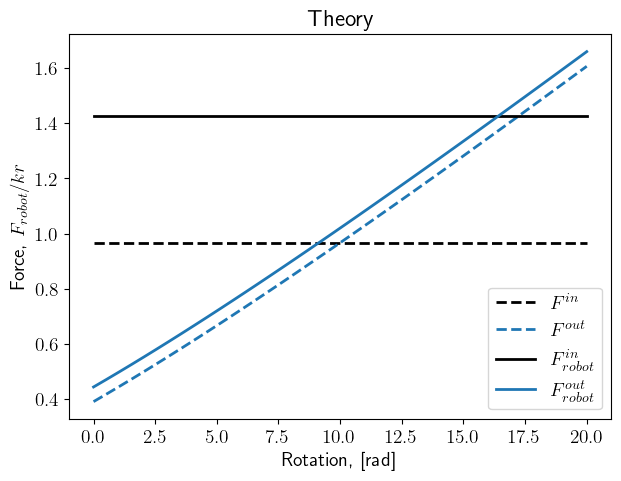

In [ ]:
#### Plotting data: for 00 -> plot F0, for 11 -> plot F1     

fig, axes = plt.subplots(figsize=(7, 5))
axes.plot(px,F0_in,color = 'black',lw = 2, linestyle='--') 
axes.plot(px,F0_out,color = '#1f77b4',lw = 2, linestyle='--')

axes.plot(px,F0_in_r,color = 'black',lw = 2)
axes.plot(px,F0_out_r,color = '#1f77b4',lw = 2)

axes.set(xlabel="Rotation, [rad]",ylabel="Force, $F_{robot}/kr$",title='Theory')
axes.legend(['$F^{in}$','$F^{out}$','$F^{in}_{robot}$','$F^{out}_{robot}$'])

plt.plot
print(np.shape(F0_out_r))

fig.savefig(r'./F0.pdf', dpi=600)